In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

classes = {"WALKING": 1, "WALKING_UPSTAIRS": 2, "WALKING_DOWNSTAIRS": 3, "SITTING": 4, "STANDING": 5, "LAYING": 6}

def scale_down_sampled_data(folder_path, samples=5):
    data = []
    for cls in classes:
        for i in range(1, samples):
            try:
                file_path = f"{folder_path}/{cls.lower()}_{i}.csv"
                key = classes.get(cls)
                sample_data = pd.read_csv(file_path)
            except FileNotFoundError:
                print(f"File not found: {file_path}")
                continue

            sample_data.index = pd.to_timedelta(sample_data.index / 200, unit='s')  # Assuming 200Hz
            
            columns_to_drop = ['time', 'aT (m/s^2)']
            if cls in ['SITTING', 'STANDING']:
                columns_to_drop.append('TgF')
            
            sample_data = sample_data.drop(columns=[col for col in columns_to_drop if col in sample_data.columns])

            # Downsample to 50Hz by taking the mean of every 4 rows
            downsampled_data = sample_data.resample('20ms').mean()  # 20ms is 1/50s

            # Reset index to get a nice, clean dataframe
            downsampled_data.reset_index(drop=True, inplace=True)

            # Picking 10 seconds of data from the mid-section 
            if len(downsampled_data) >= 500:
                start_idx = (len(downsampled_data) - 500) // 2
                downsampled_data = downsampled_data[start_idx:start_idx + 500]
            else:
                print(f"Data length less than 500 samples for {file_path}")
                continue

            # Convert to numpy array and store in the list
            downsampled_data = np.array(downsampled_data)
            data.append((key, downsampled_data))

    return data


folder_path = "Accelerometer Data"
data = scale_down_sampled_data(folder_path)
# print(len(data))
for i, (key, arr) in enumerate(data):
    print(f"Sample {i+1}: Class {key}, Shape {arr.shape}")
X = np.array([b for a,b in data])
y = np.array([a for a,b in data])
print(X.shape, y.shape)

Sample 1: Class 1, Shape (500, 3)
Sample 2: Class 1, Shape (500, 3)
Sample 3: Class 1, Shape (500, 3)
Sample 4: Class 1, Shape (500, 3)
Sample 5: Class 2, Shape (500, 3)
Sample 6: Class 2, Shape (500, 3)
Sample 7: Class 2, Shape (500, 3)
Sample 8: Class 2, Shape (500, 3)
Sample 9: Class 3, Shape (500, 3)
Sample 10: Class 3, Shape (500, 3)
Sample 11: Class 3, Shape (500, 3)
Sample 12: Class 3, Shape (500, 3)
Sample 13: Class 4, Shape (500, 3)
Sample 14: Class 4, Shape (500, 3)
Sample 15: Class 4, Shape (500, 3)
Sample 16: Class 4, Shape (500, 3)
Sample 17: Class 5, Shape (500, 3)
Sample 18: Class 5, Shape (500, 3)
Sample 19: Class 5, Shape (500, 3)
Sample 20: Class 5, Shape (500, 3)
Sample 21: Class 6, Shape (500, 3)
Sample 22: Class 6, Shape (500, 3)
Sample 23: Class 6, Shape (500, 3)
Sample 24: Class 6, Shape (500, 3)
(24, 500, 3) (24,)


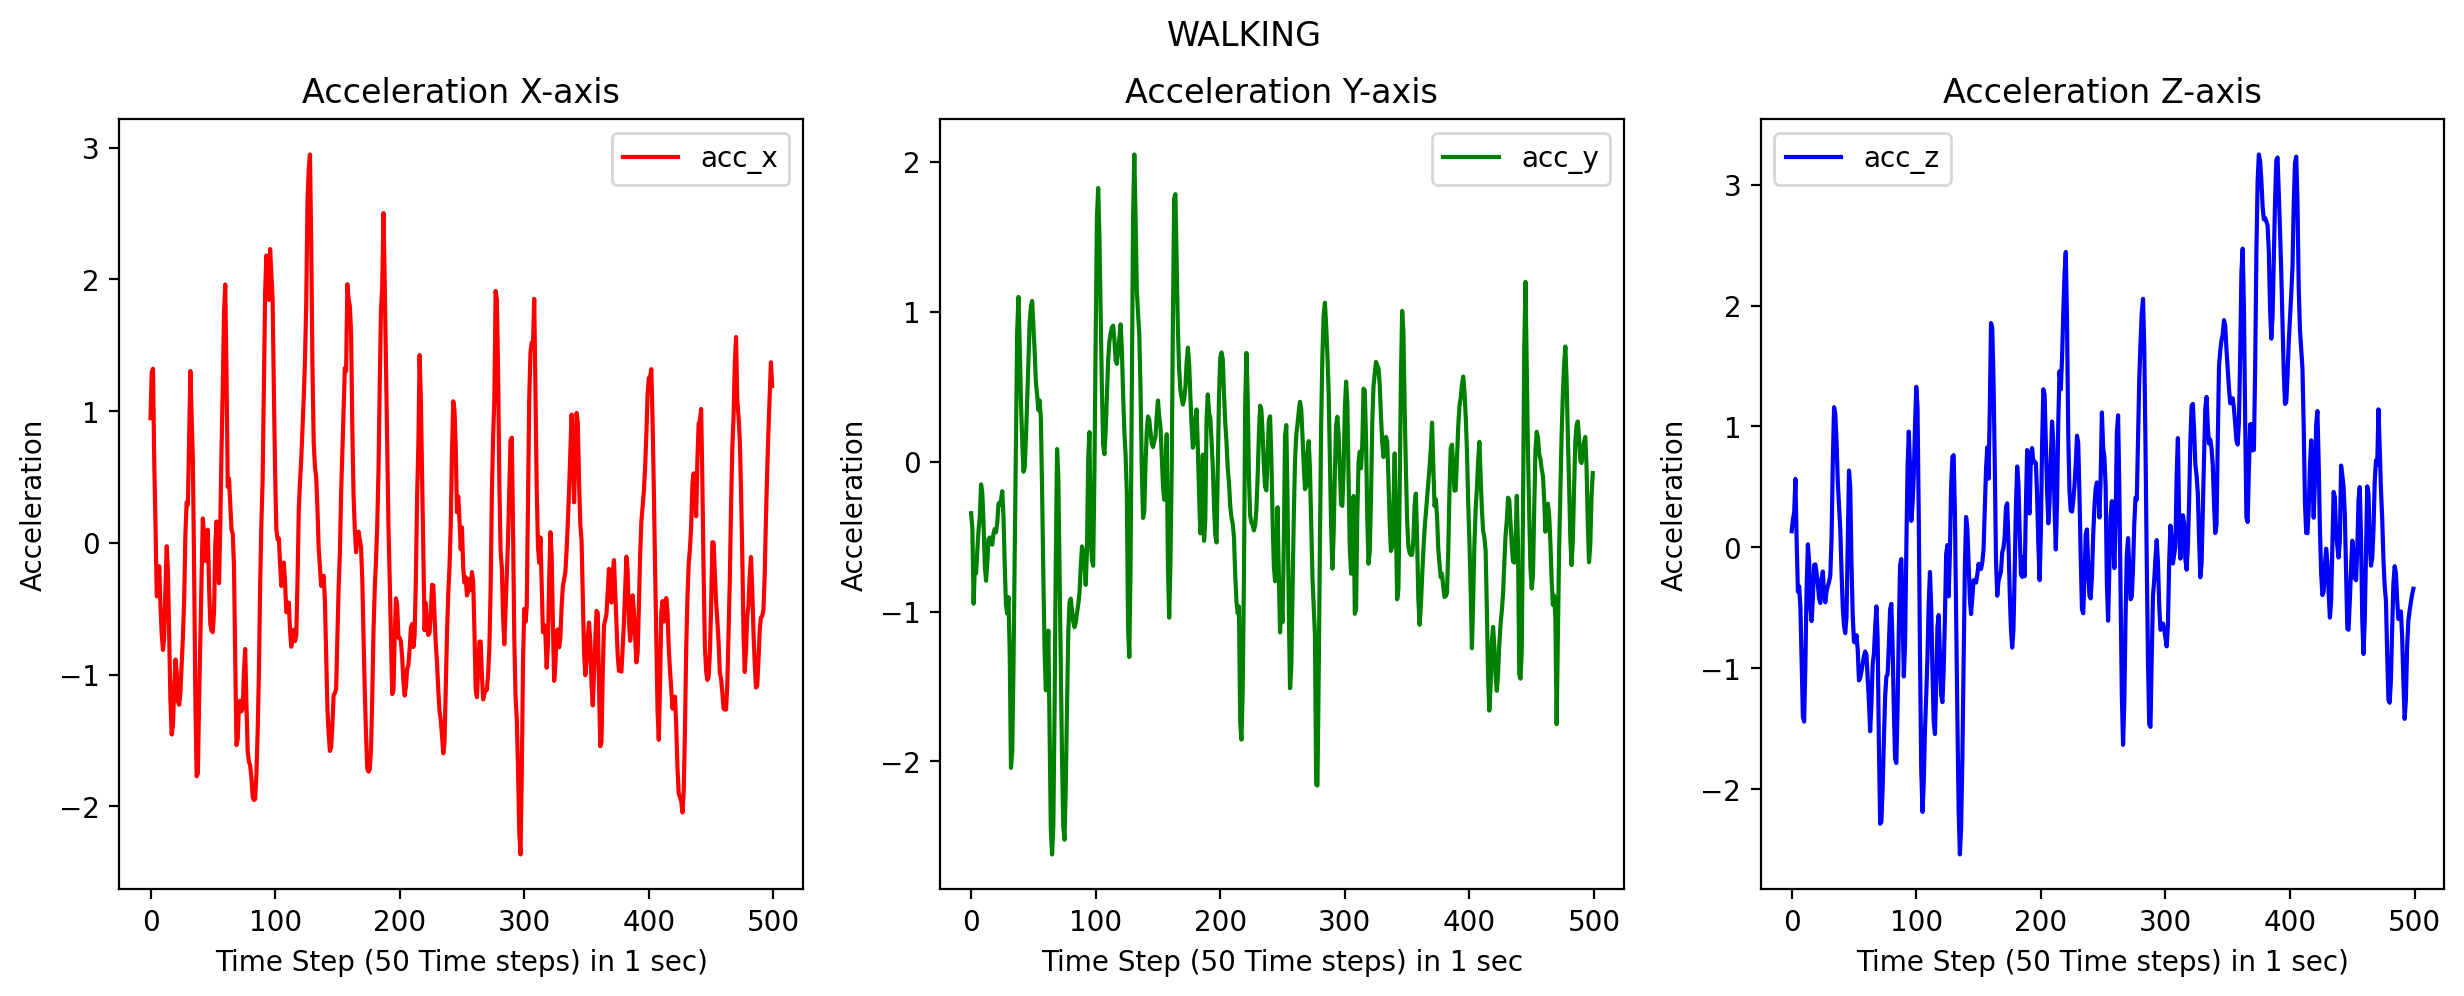

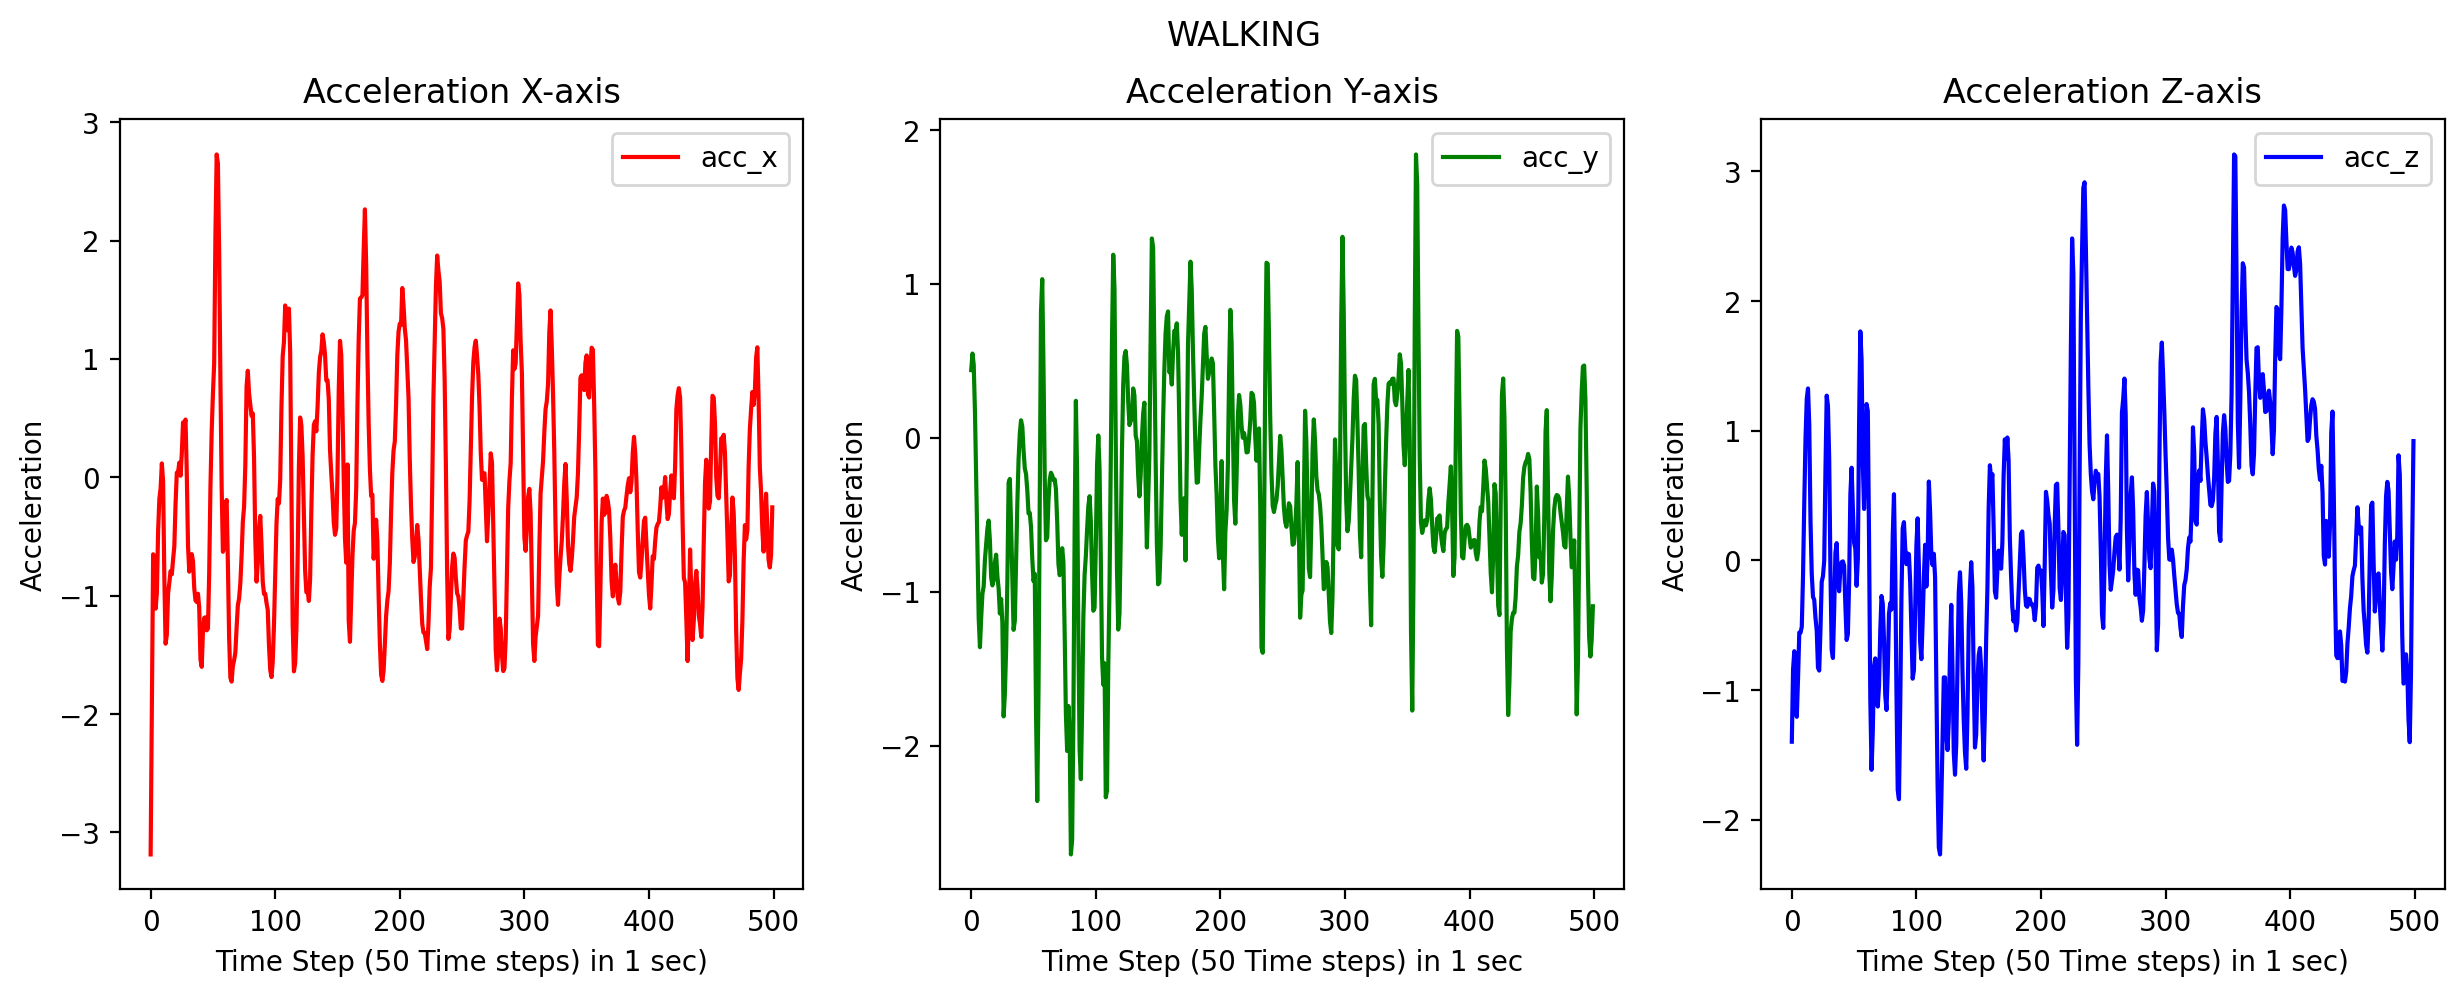

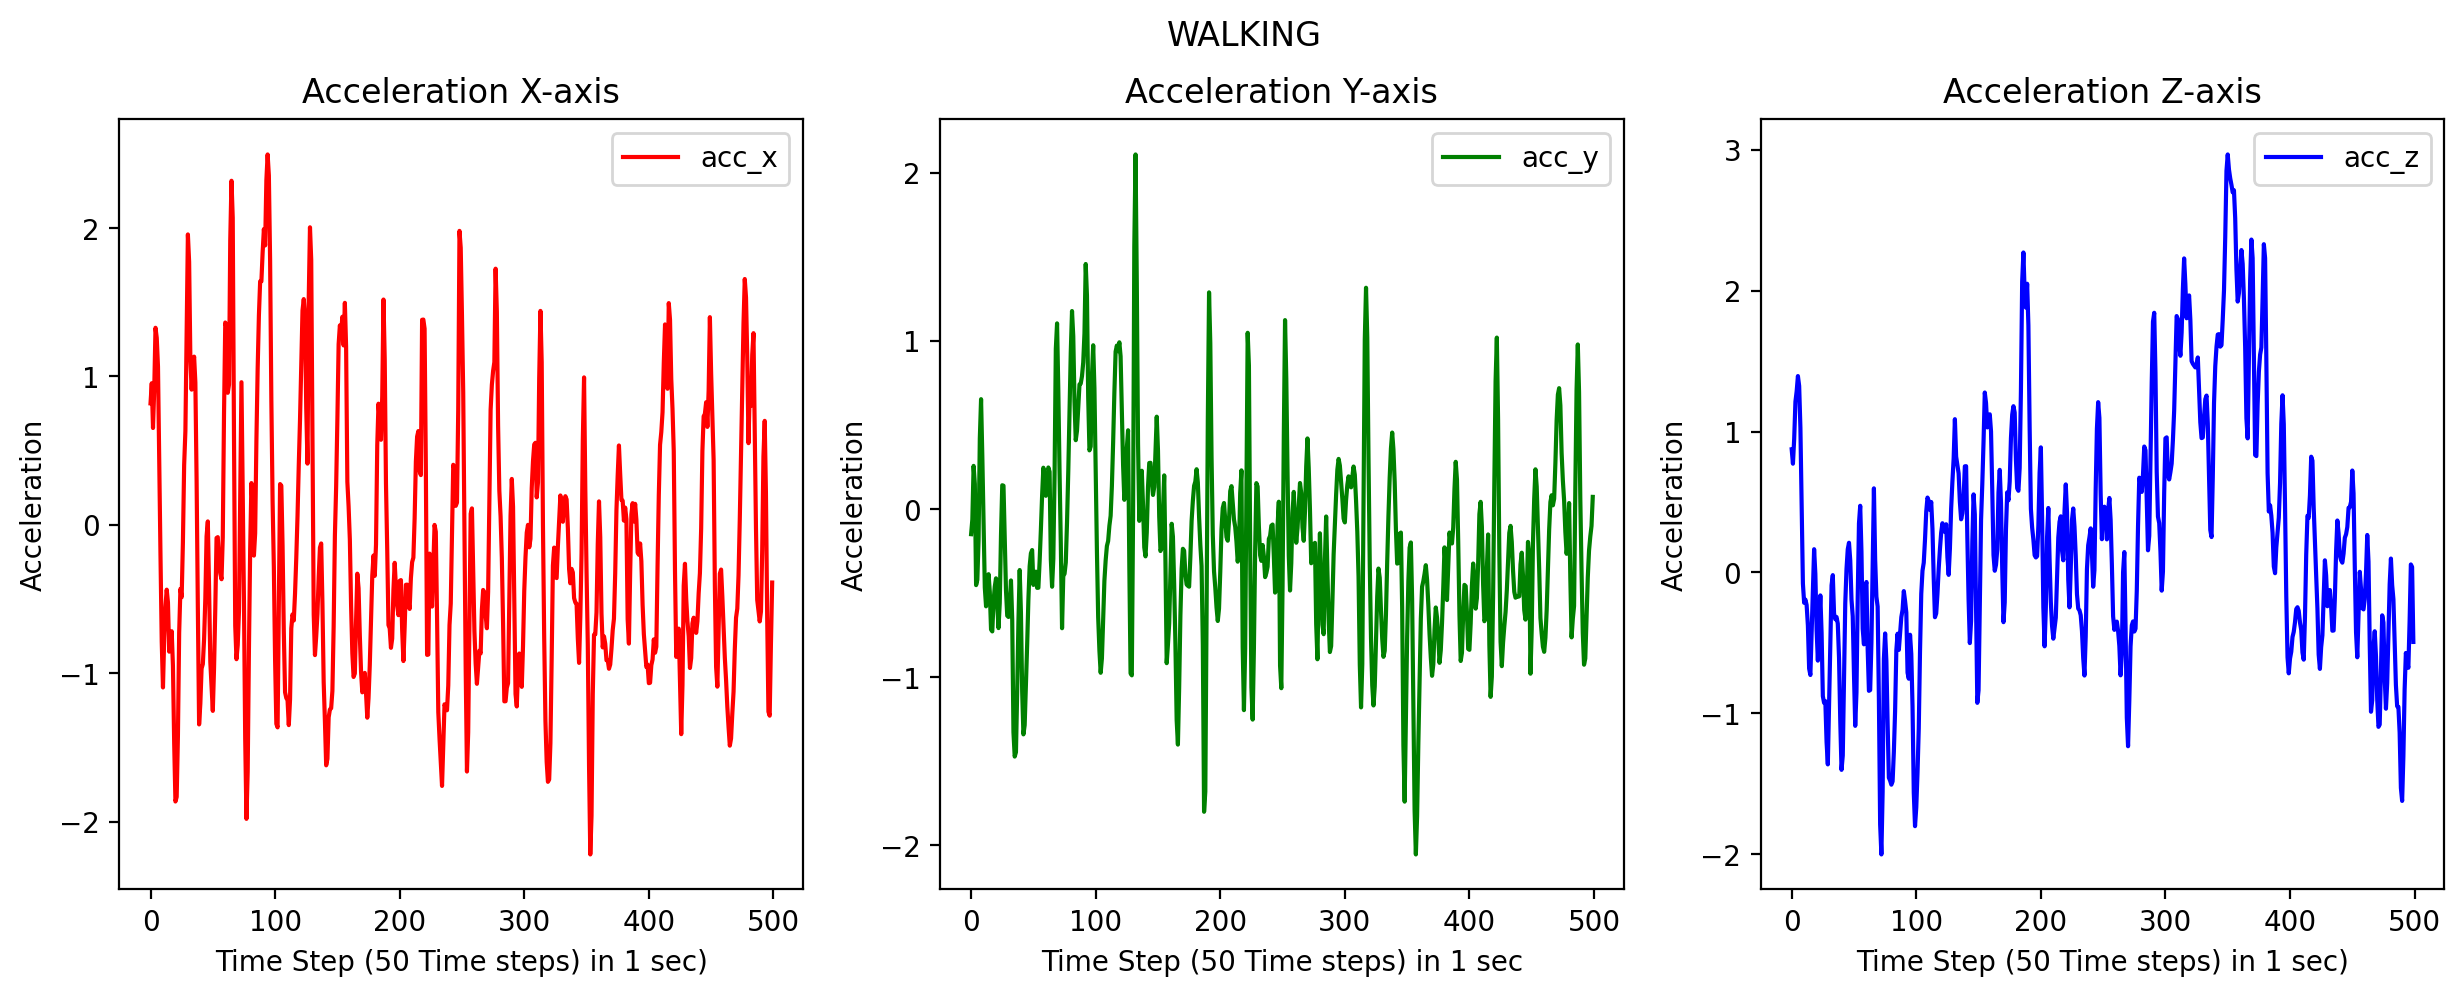

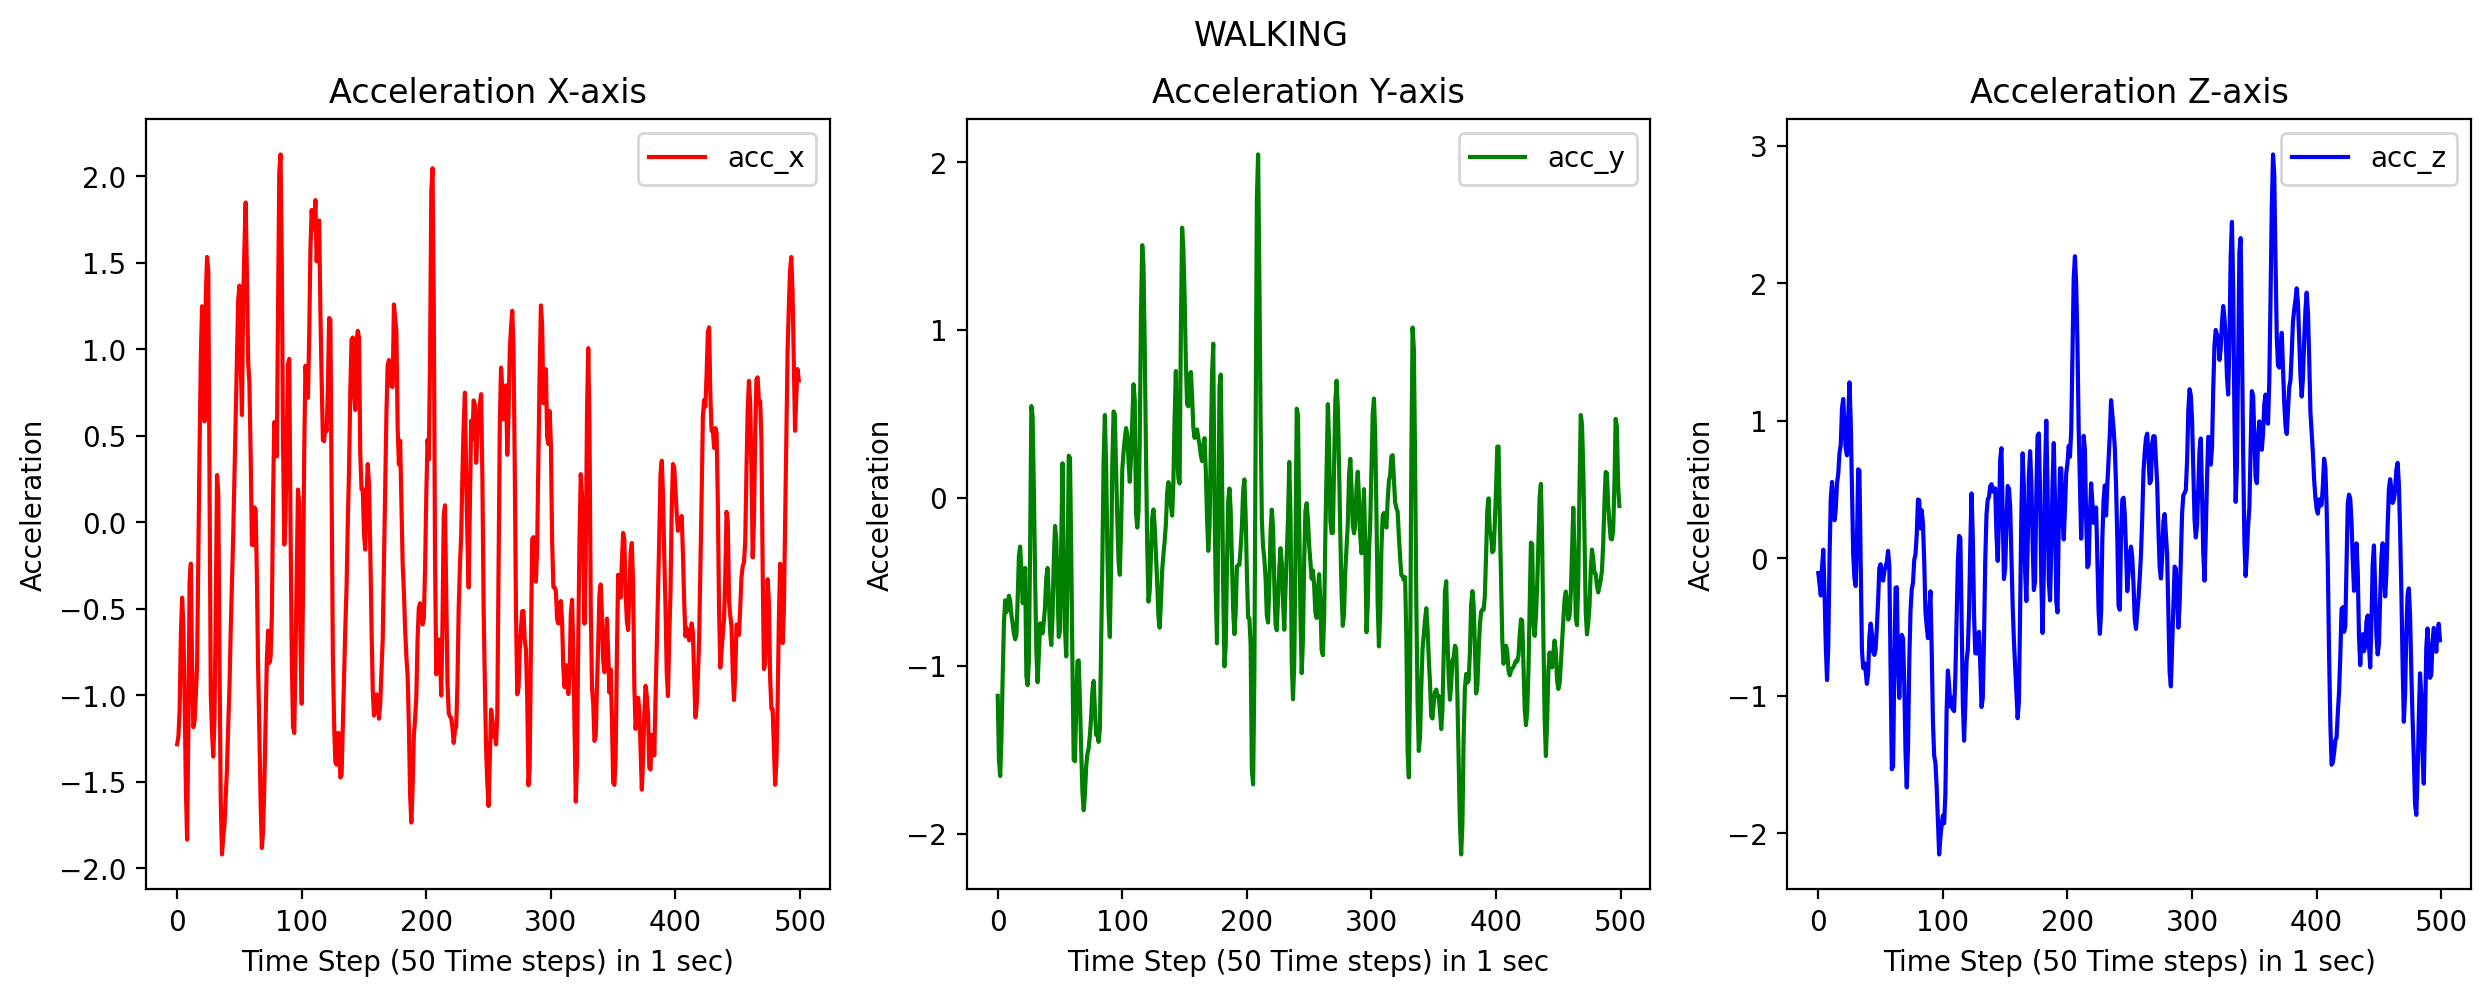

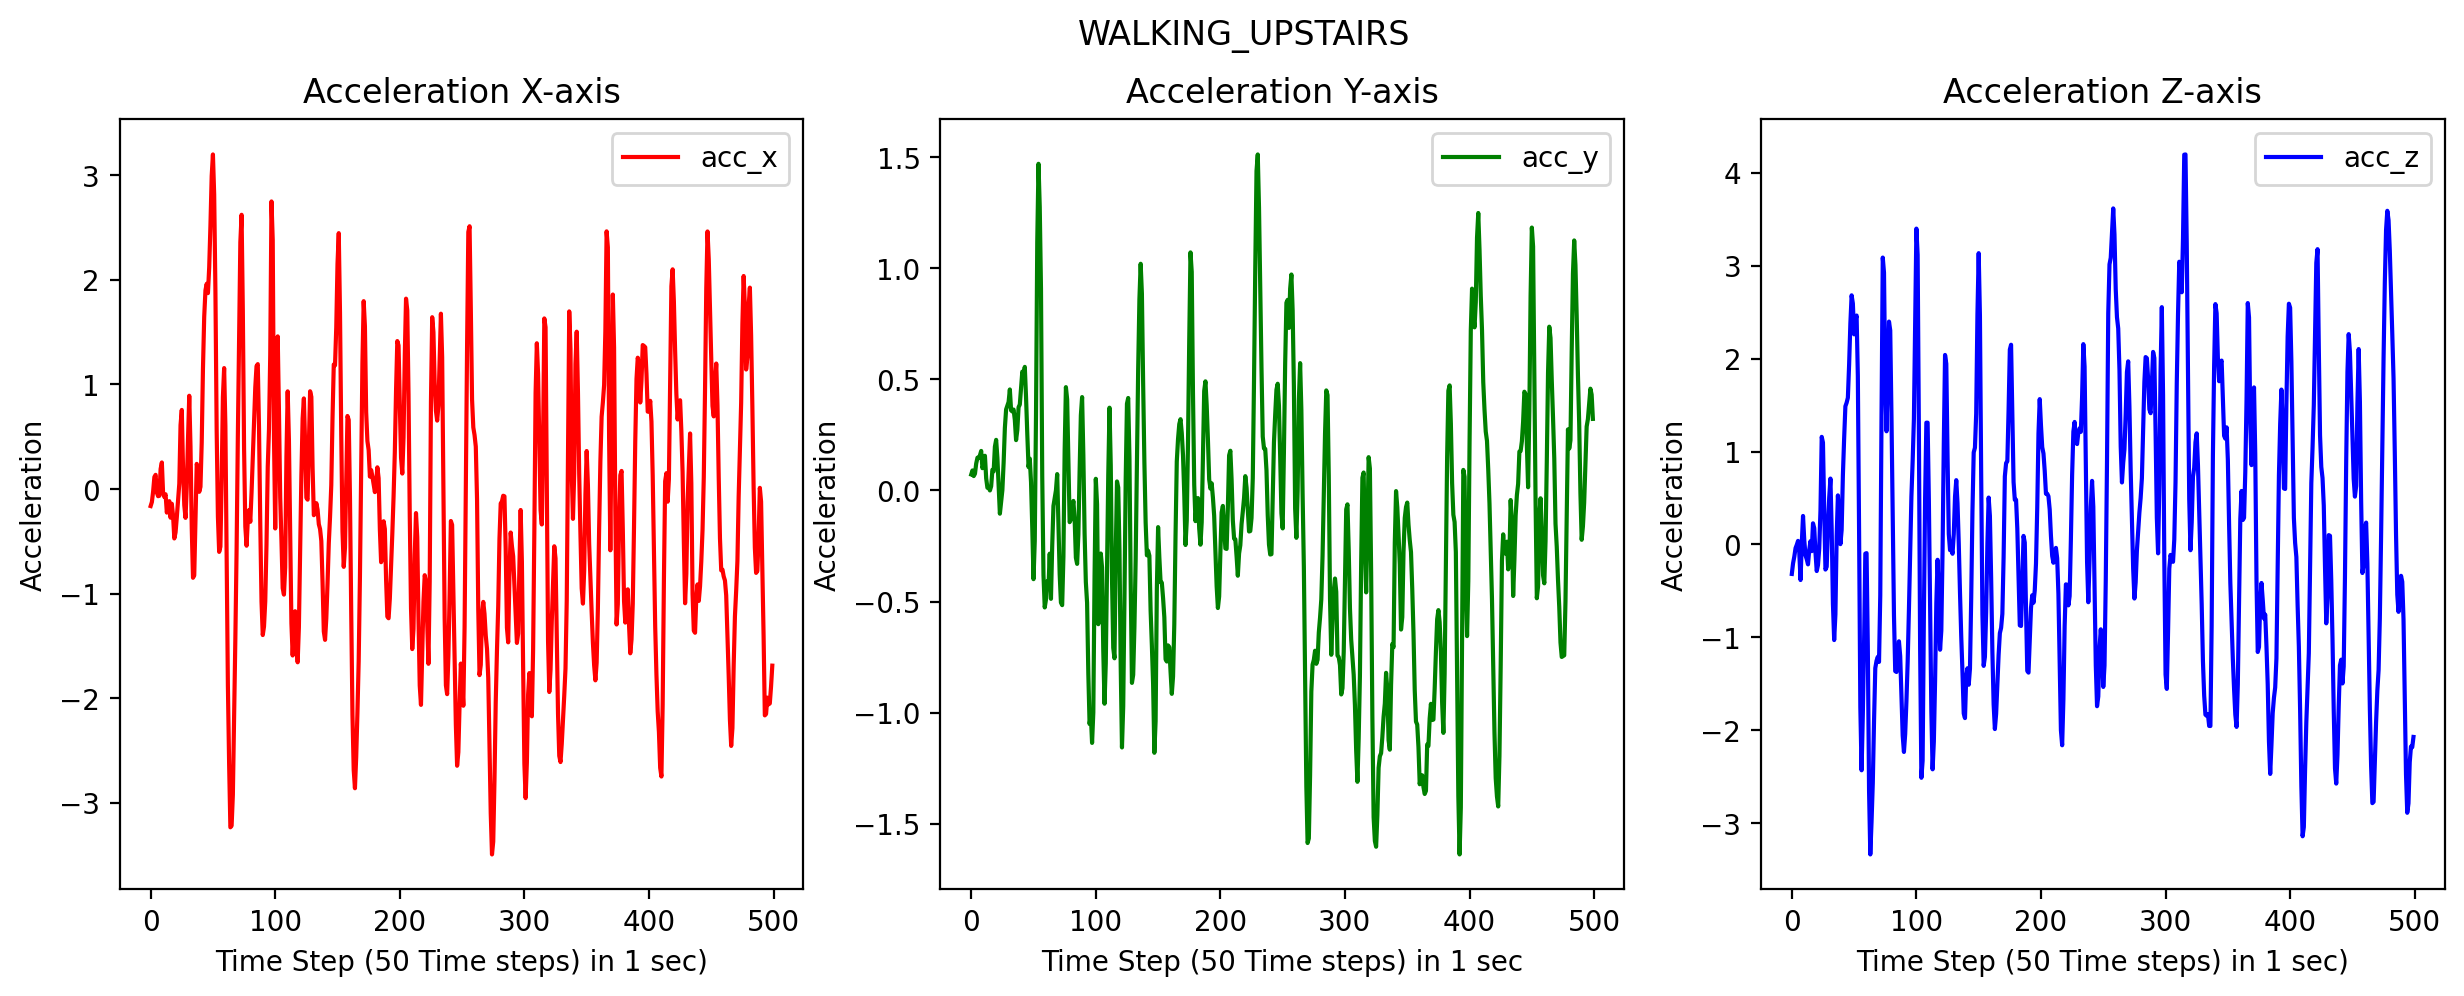

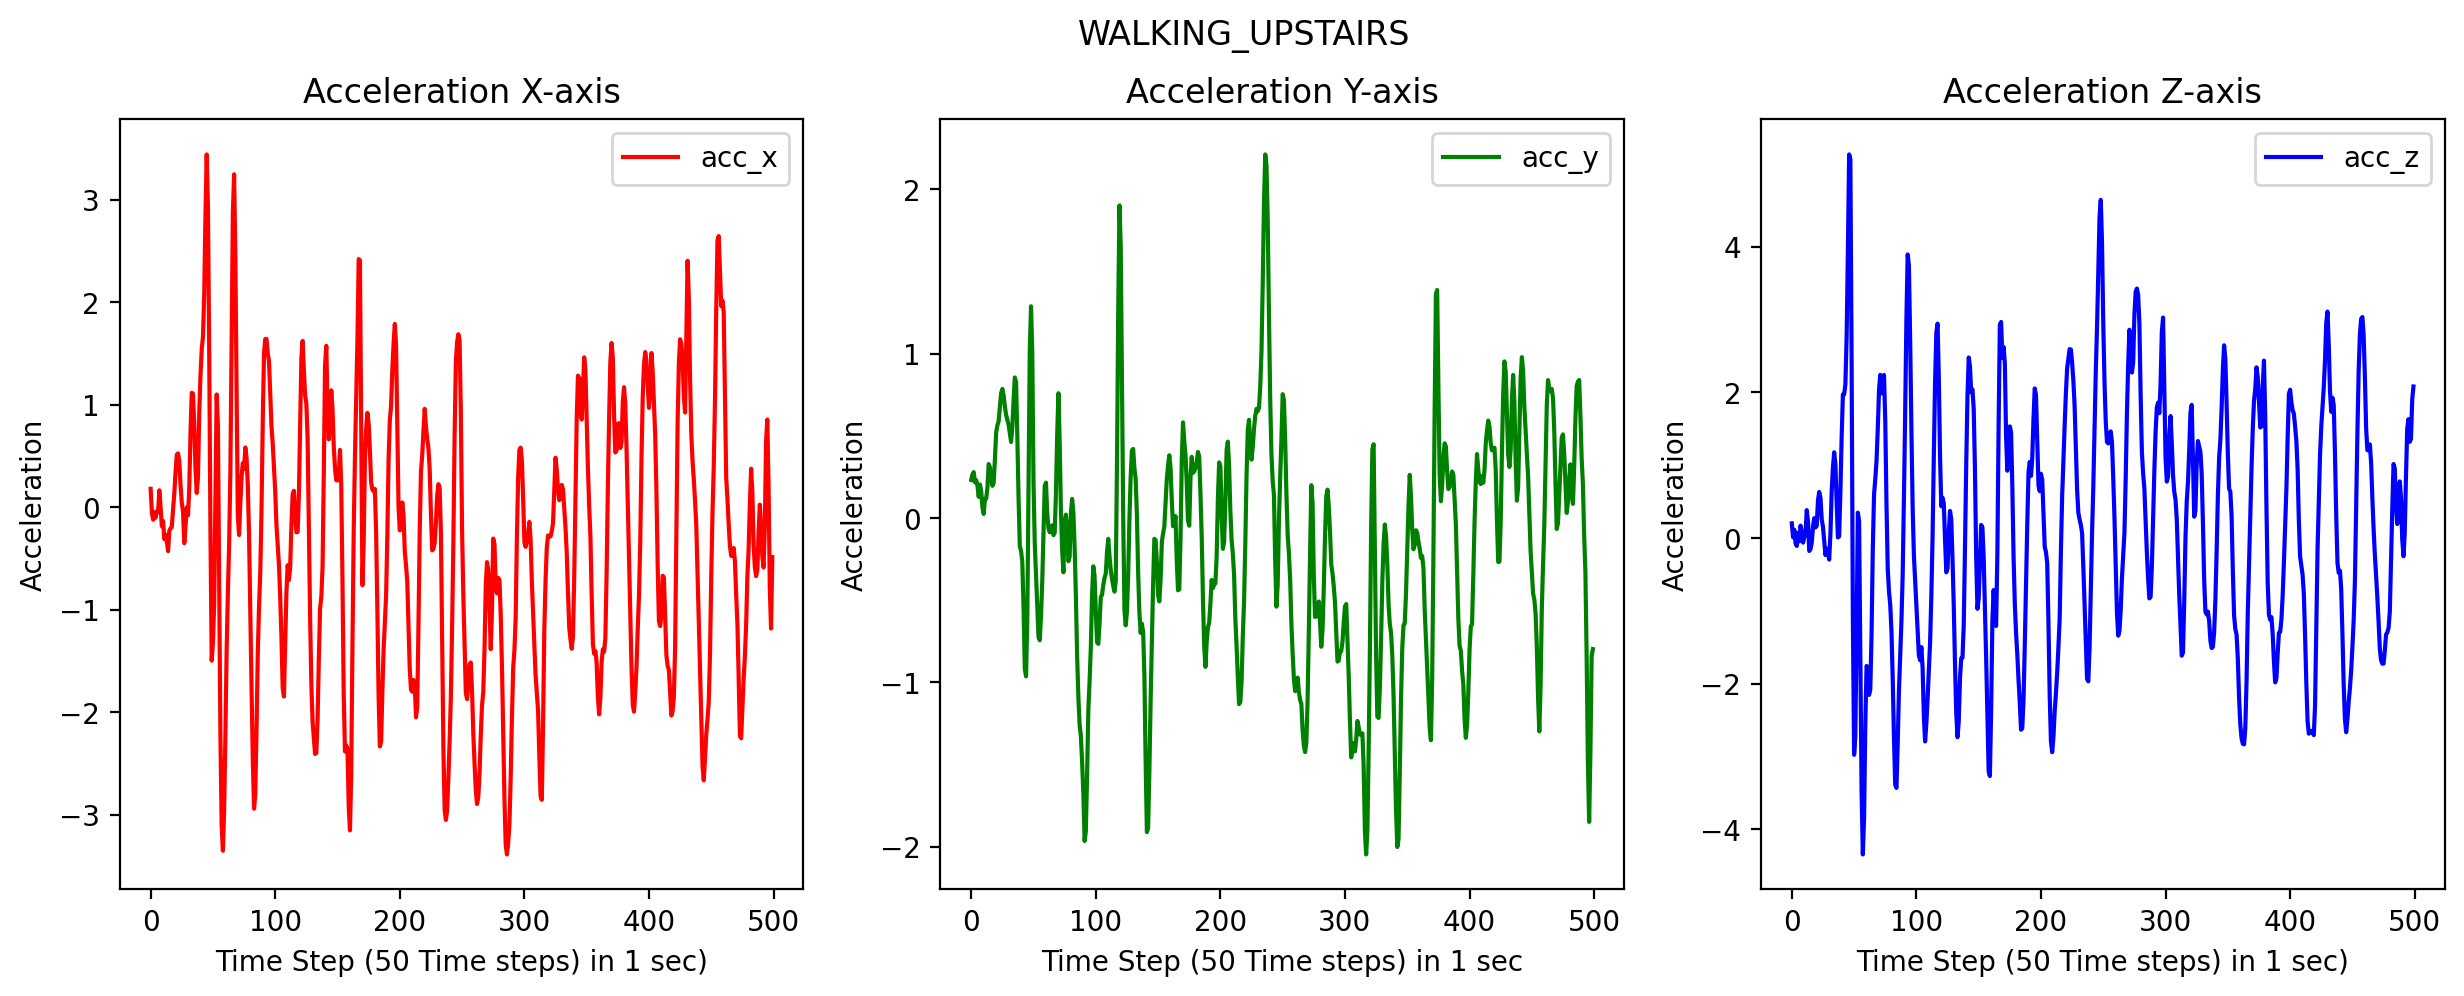

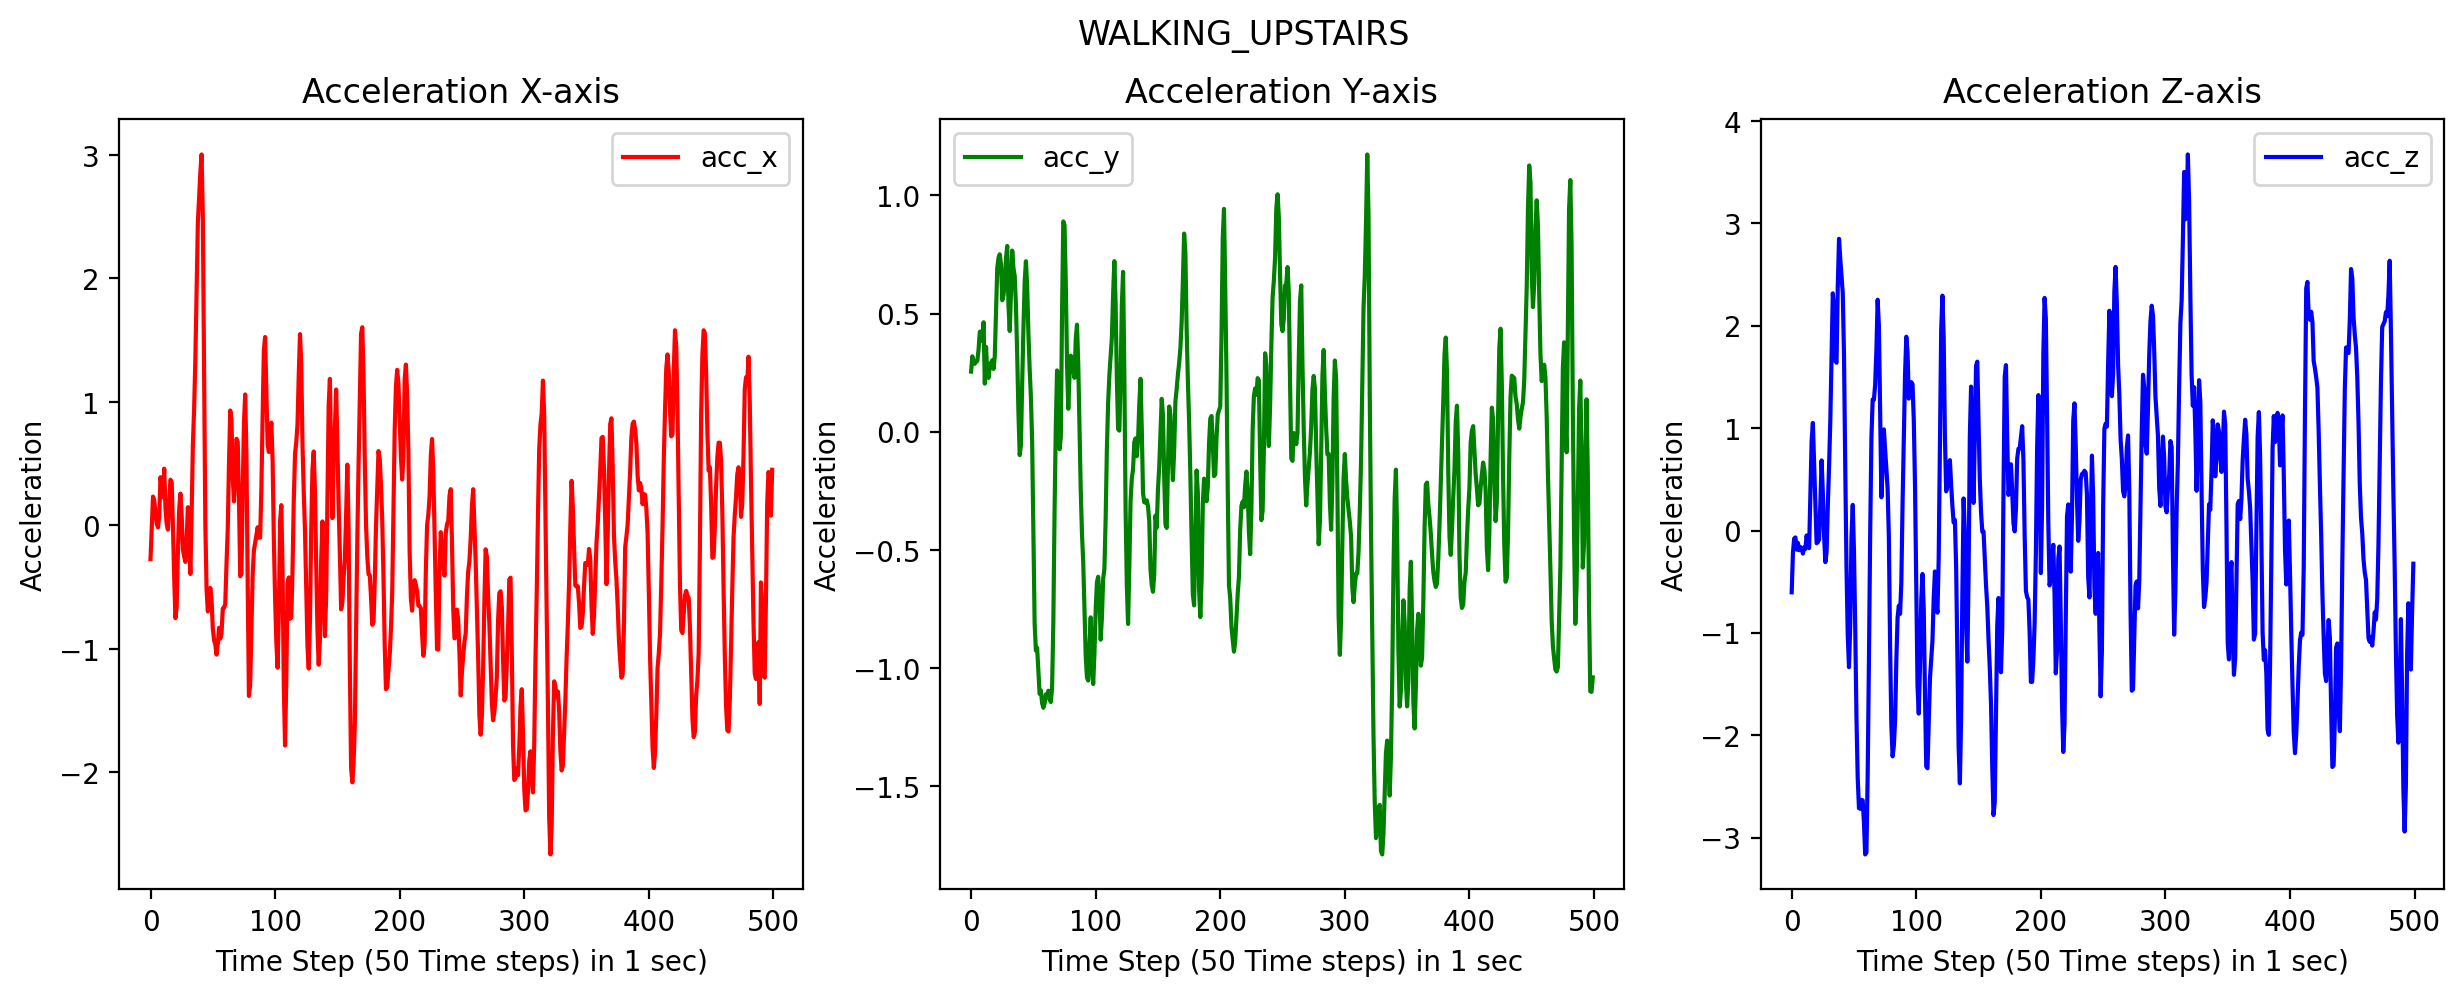

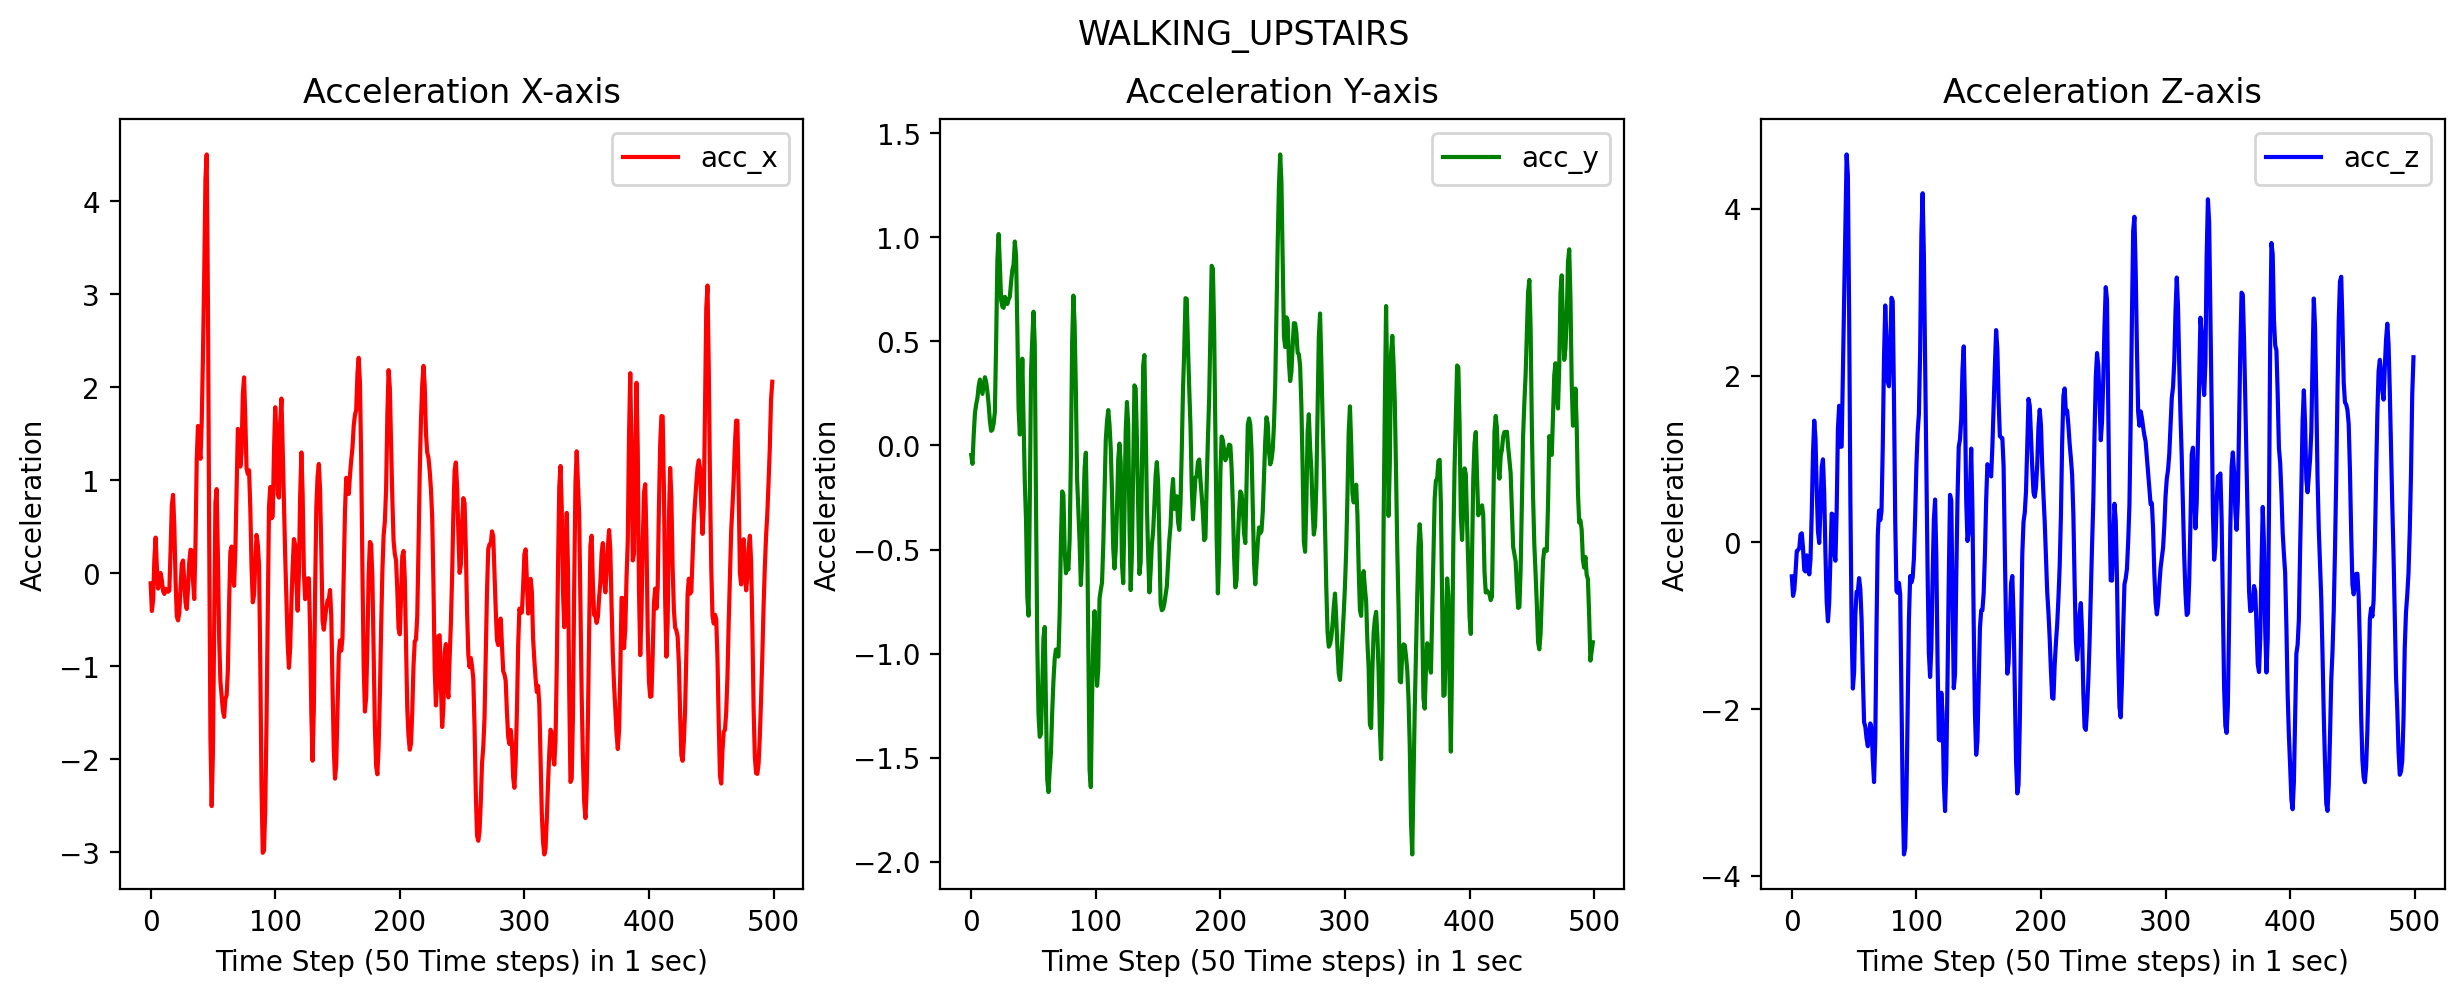

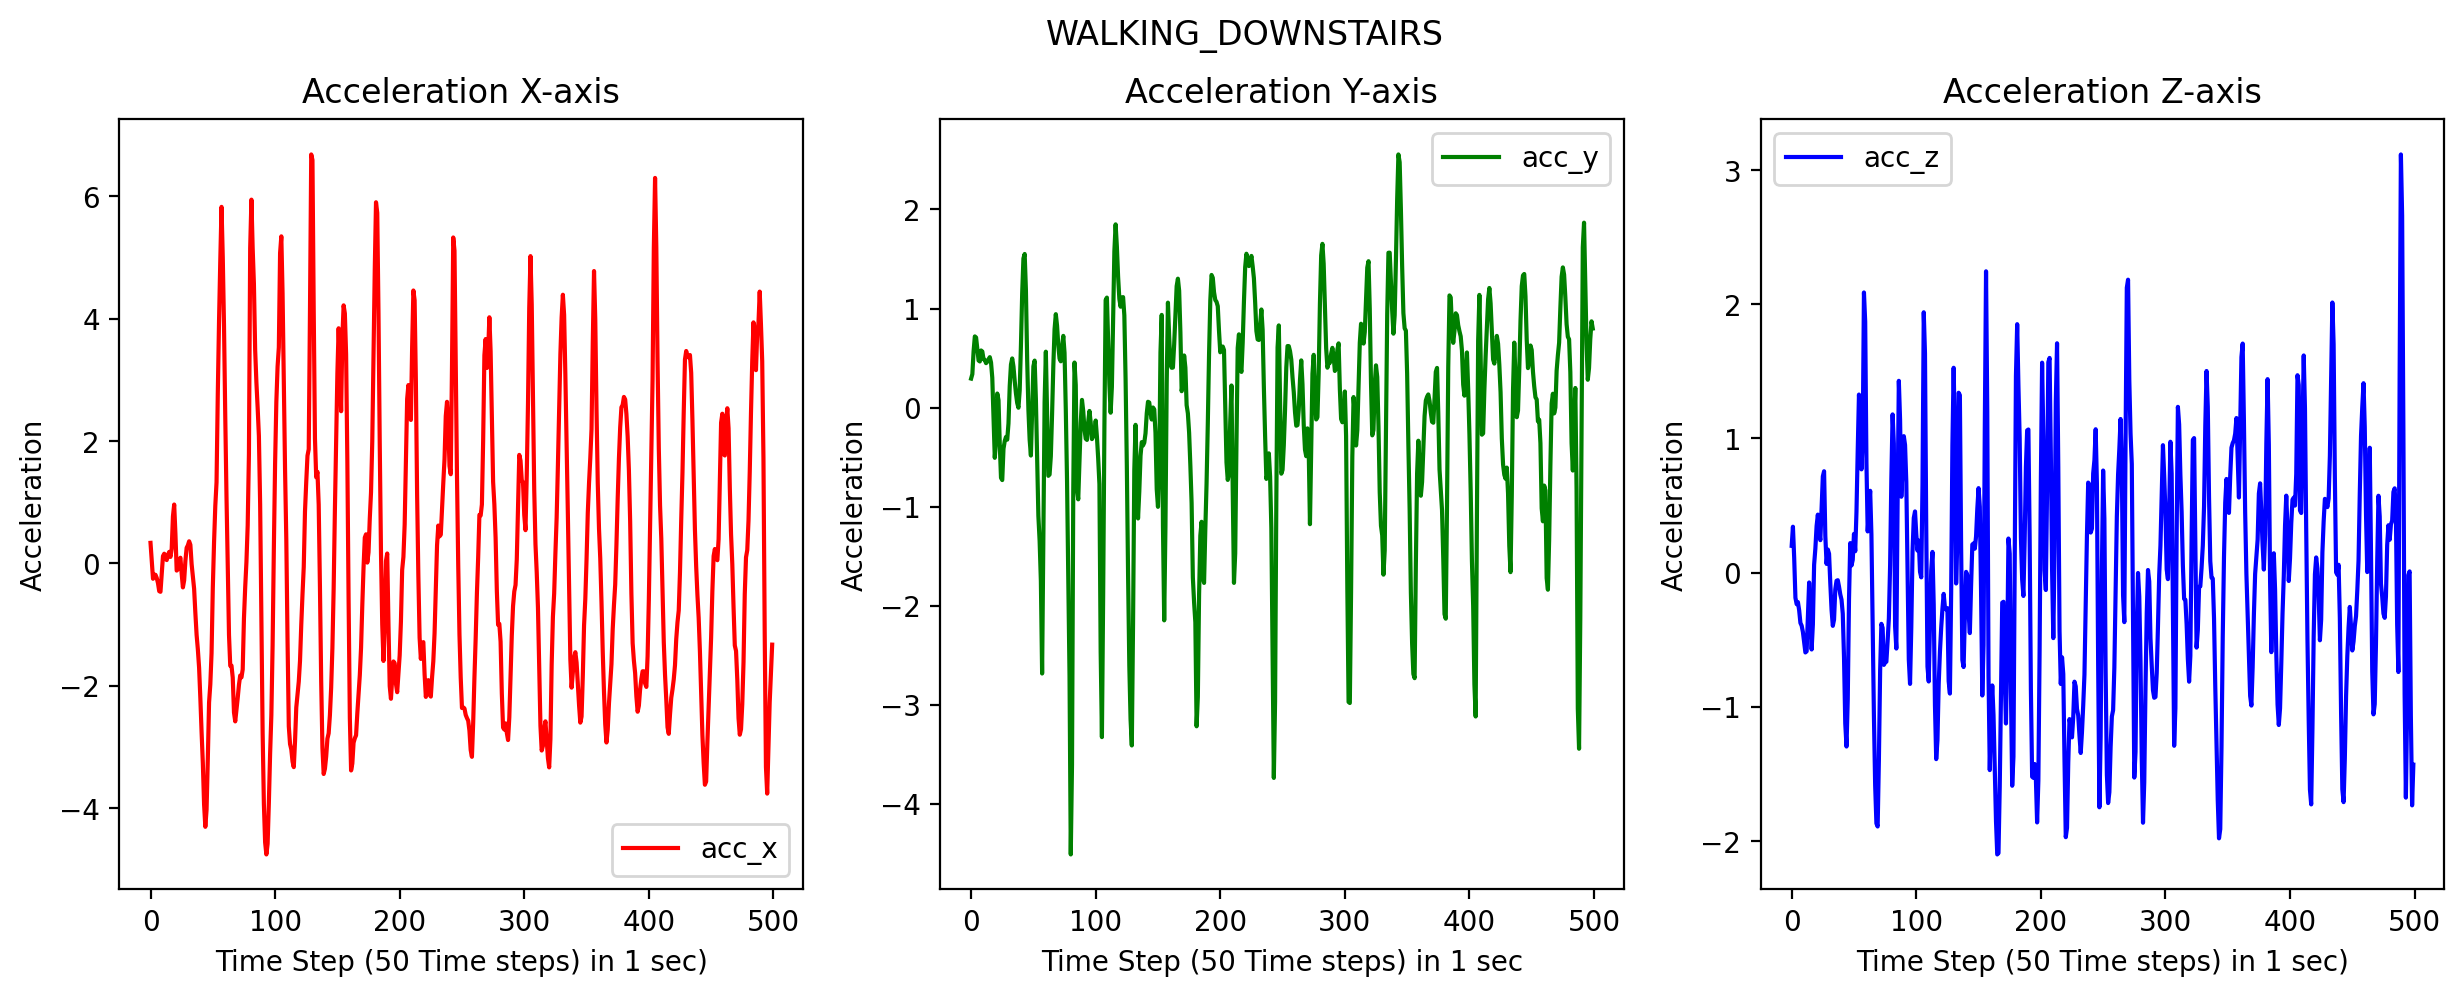

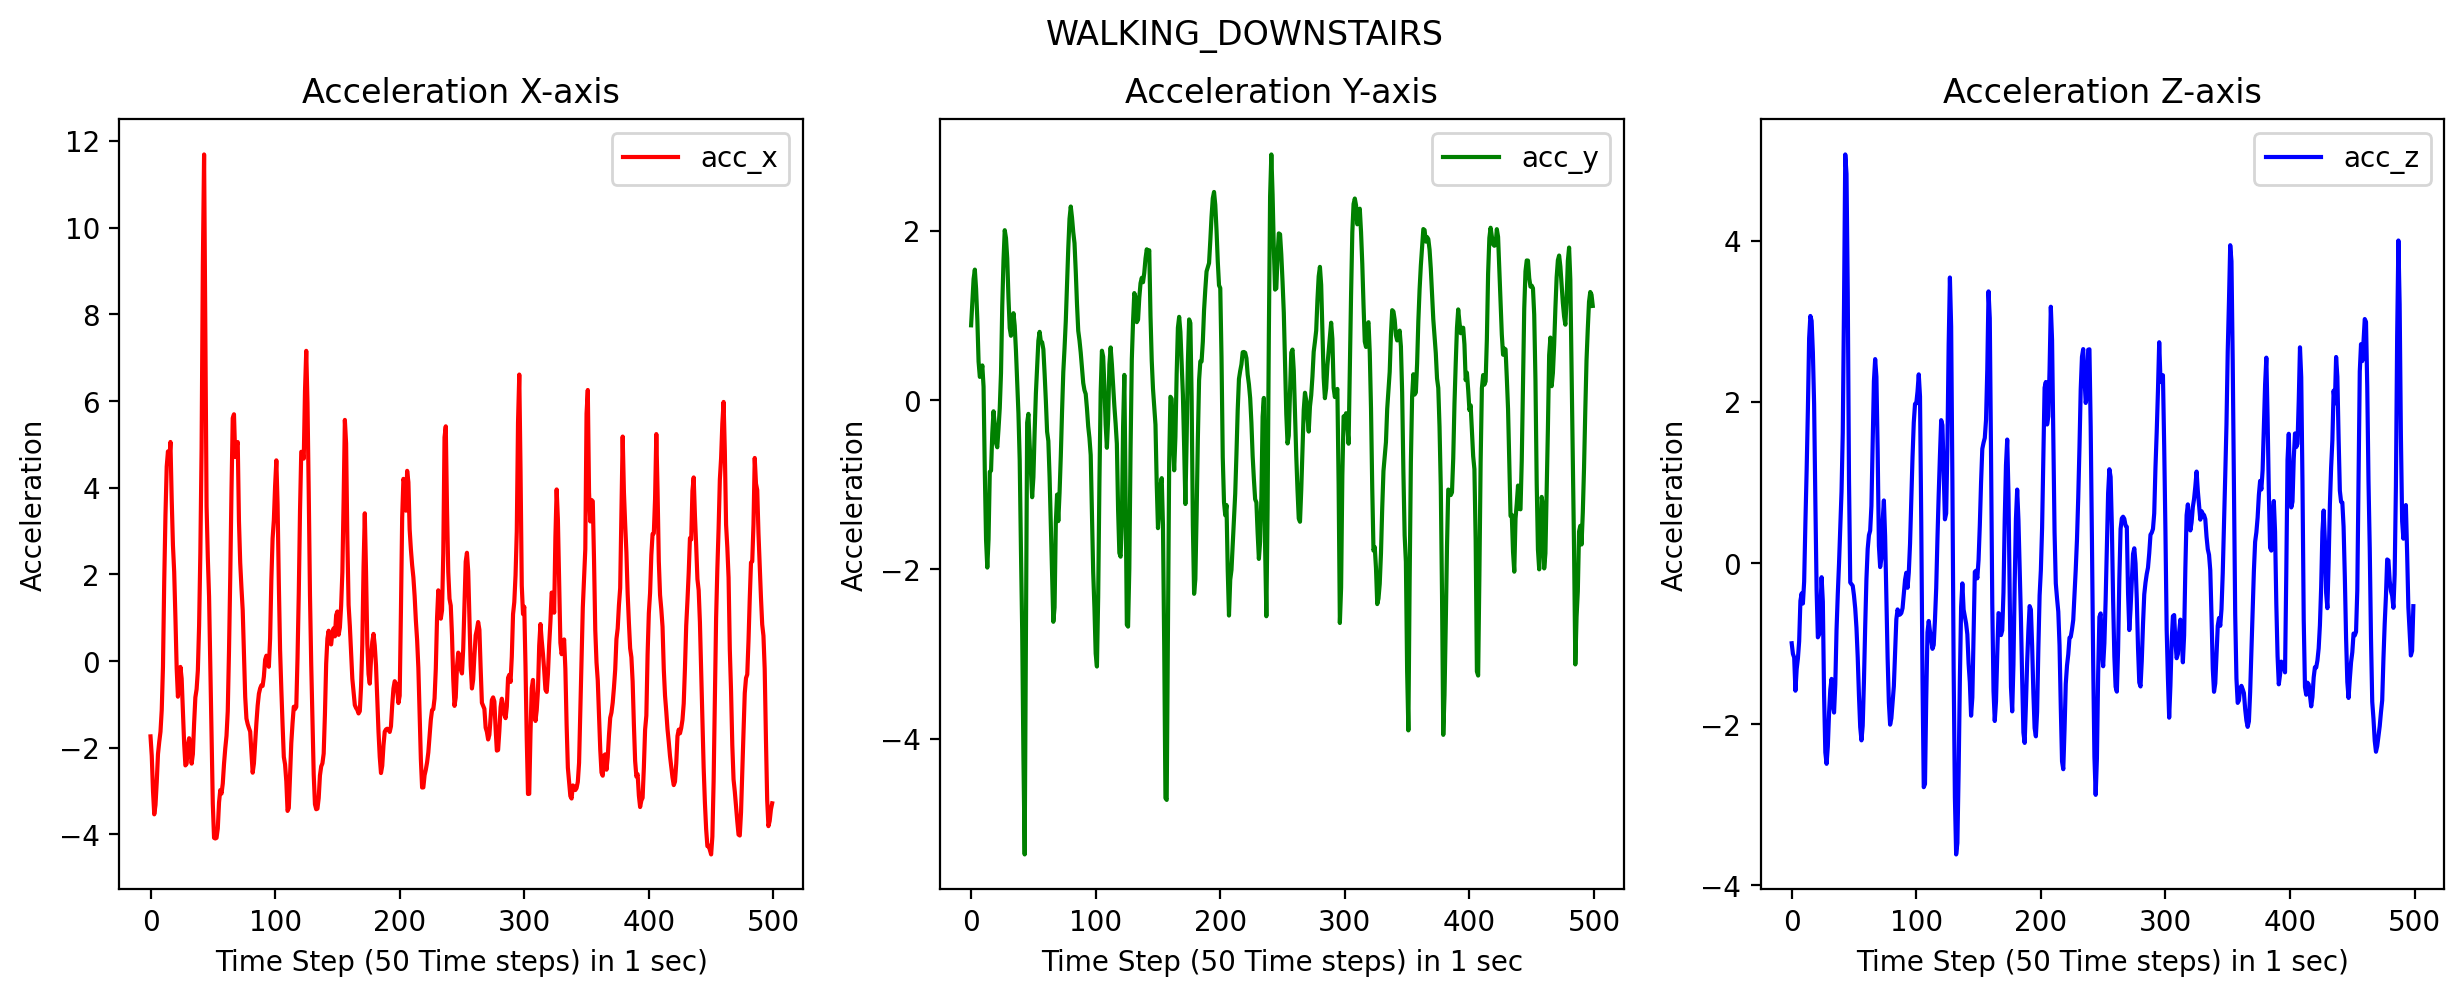

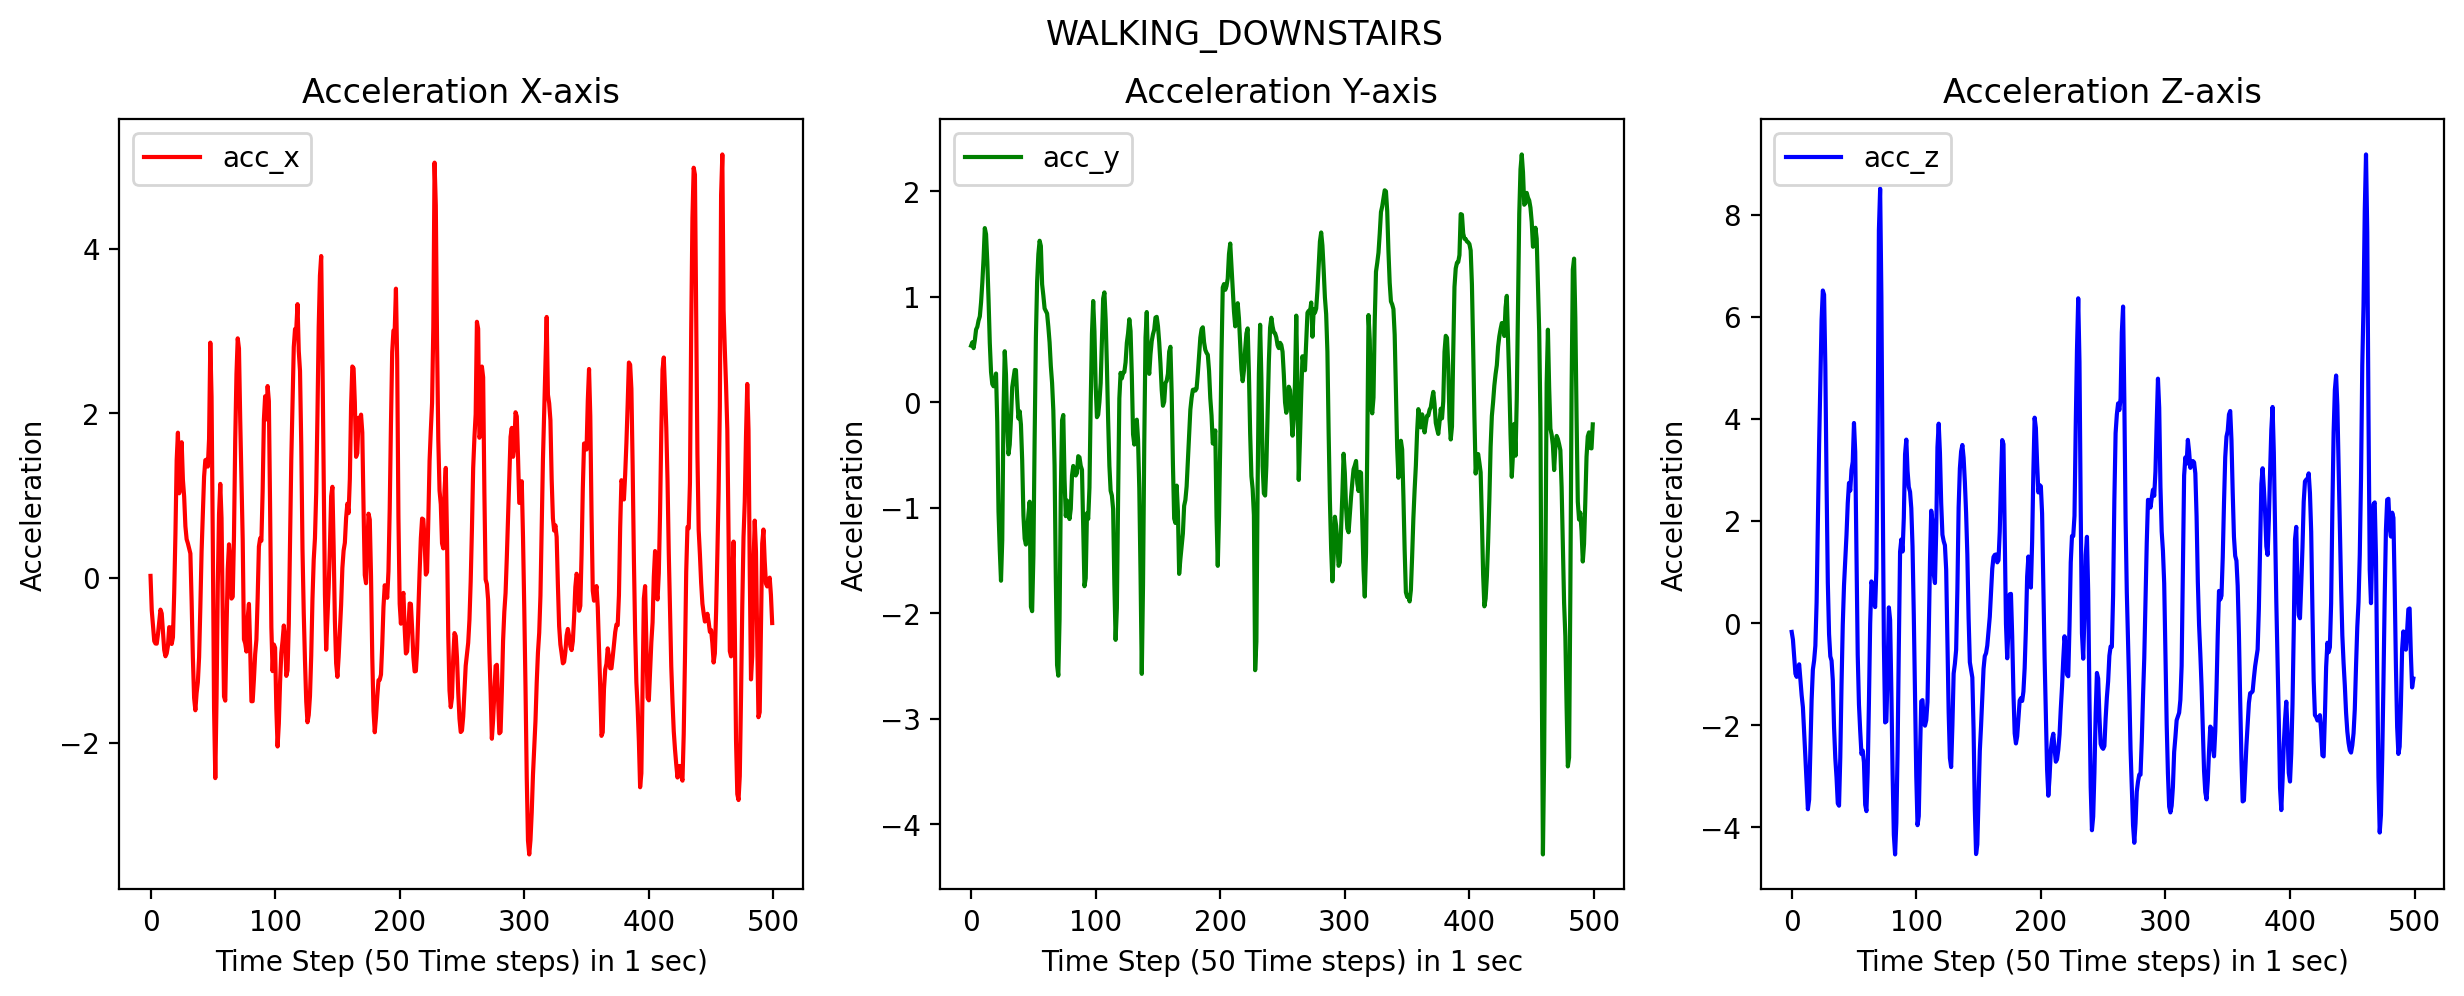

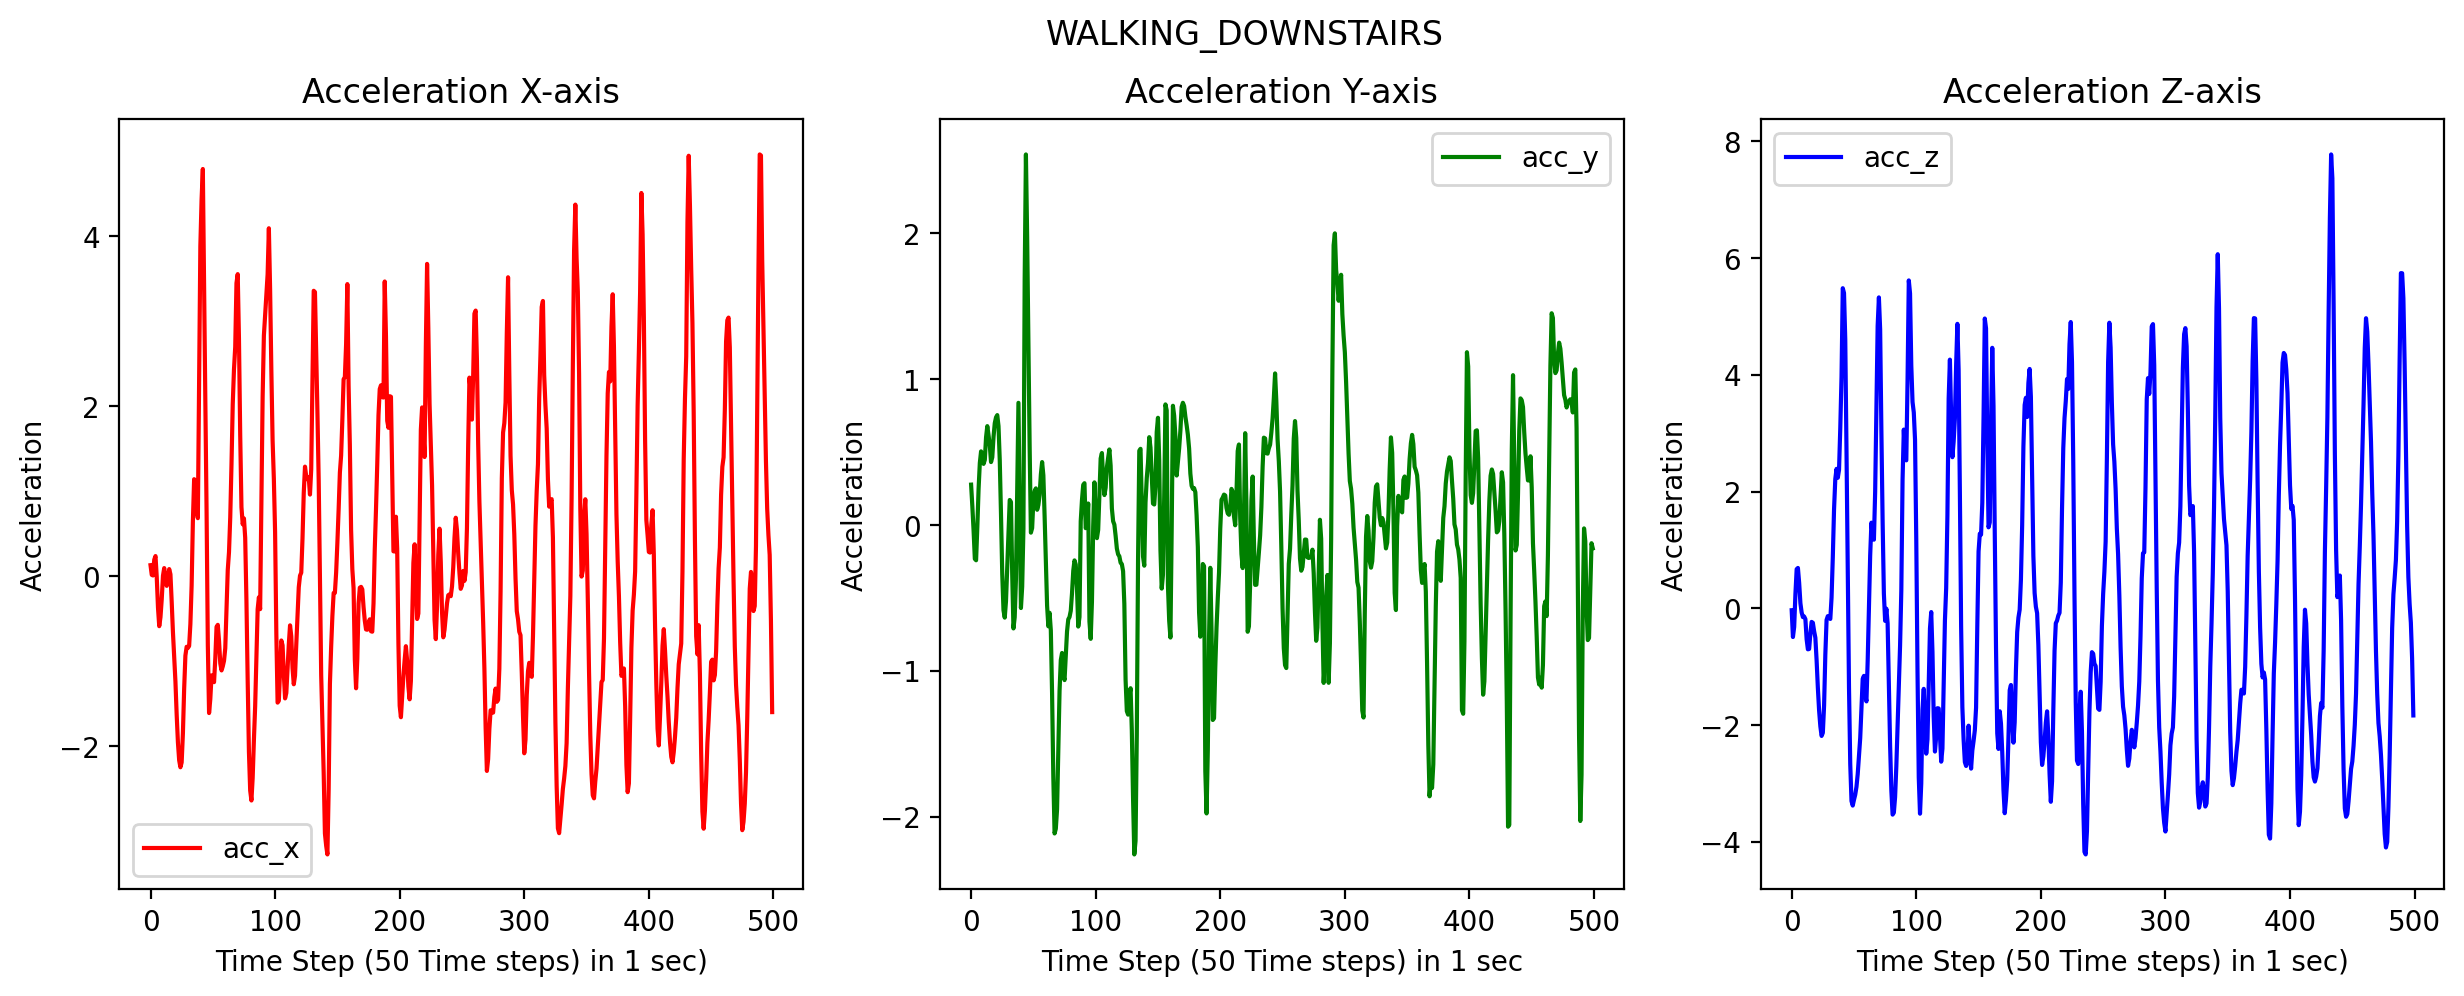

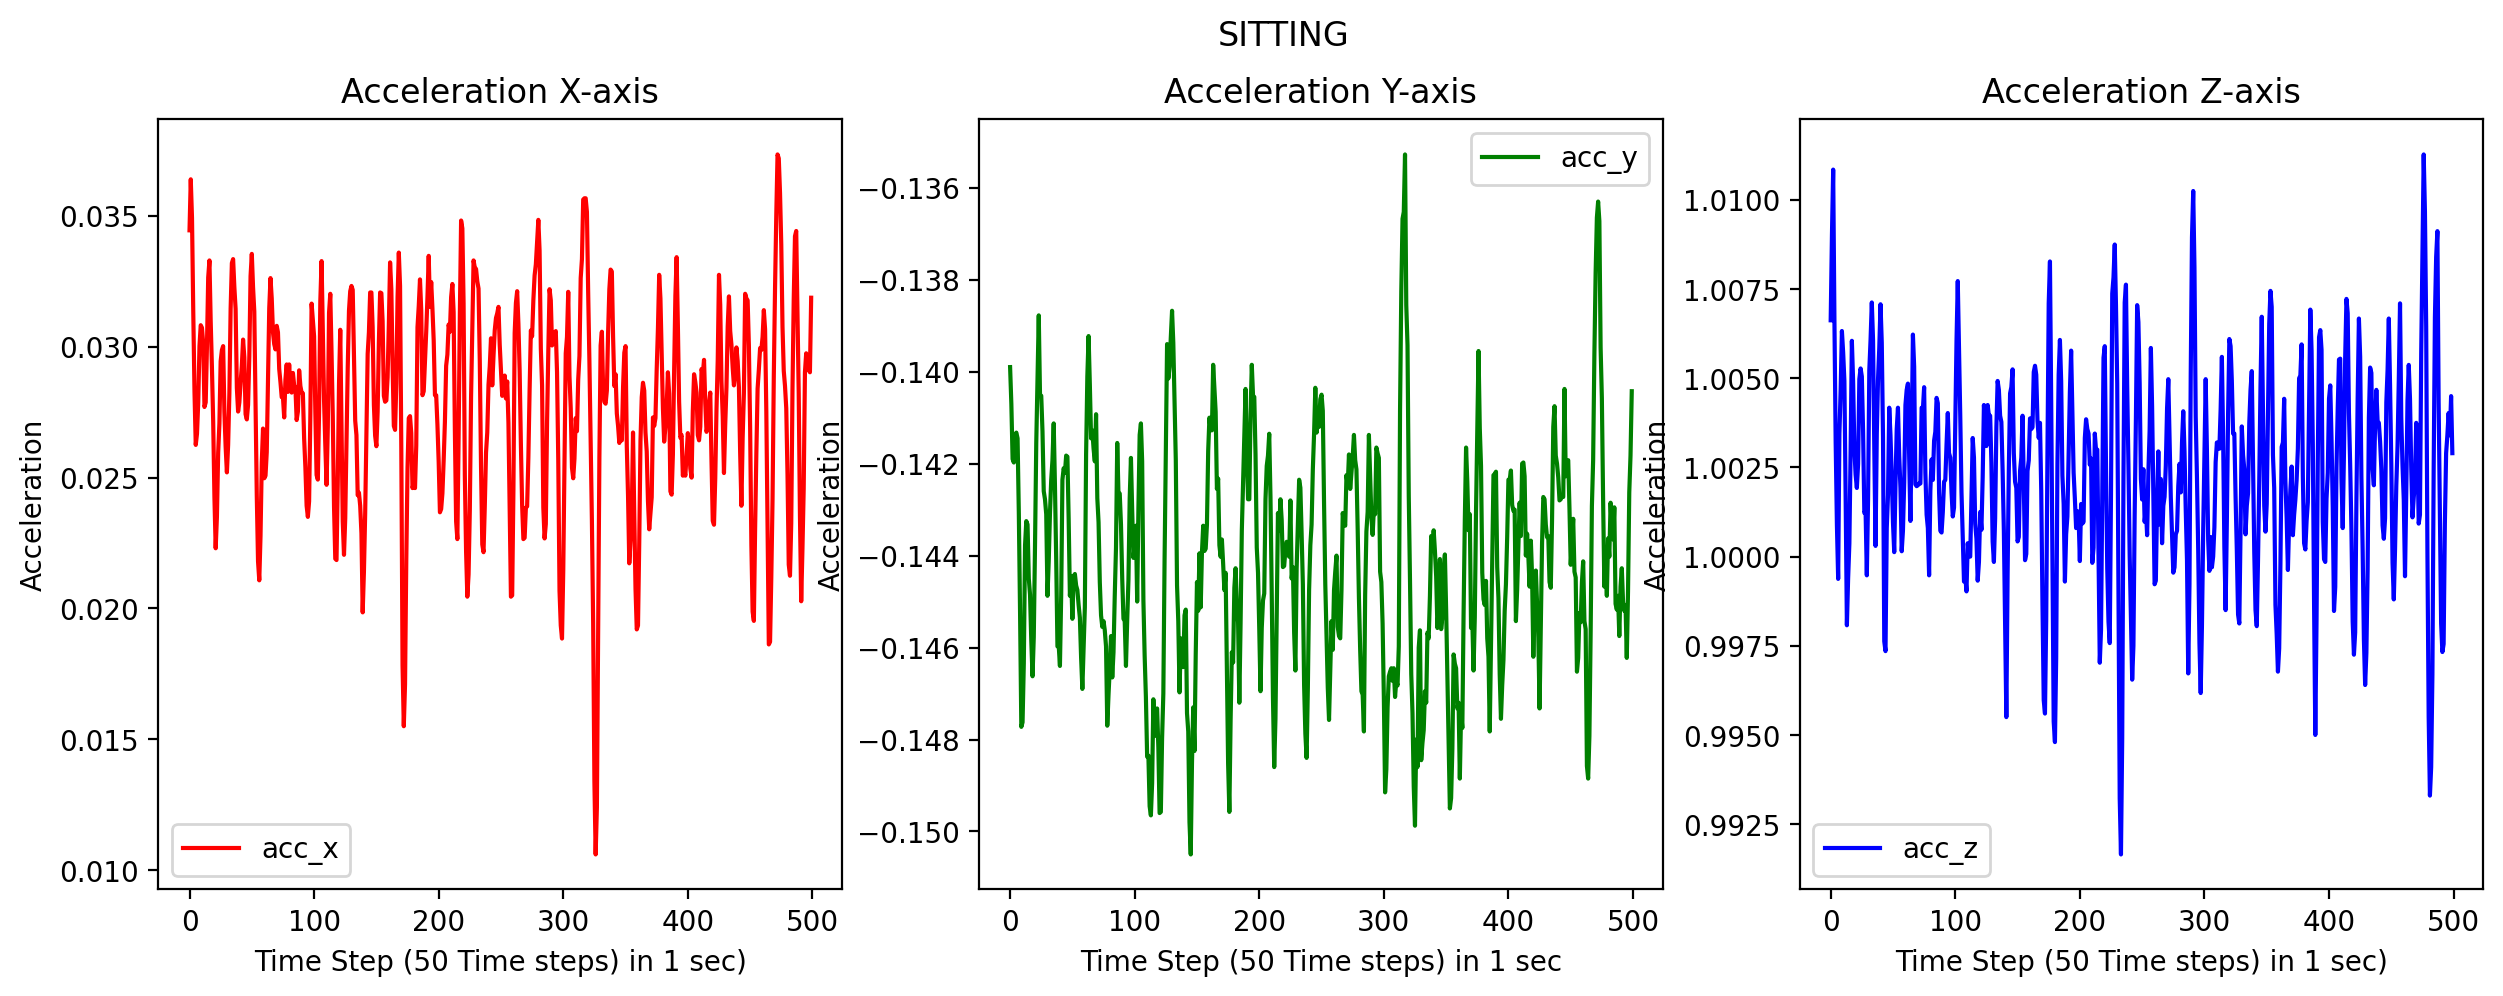

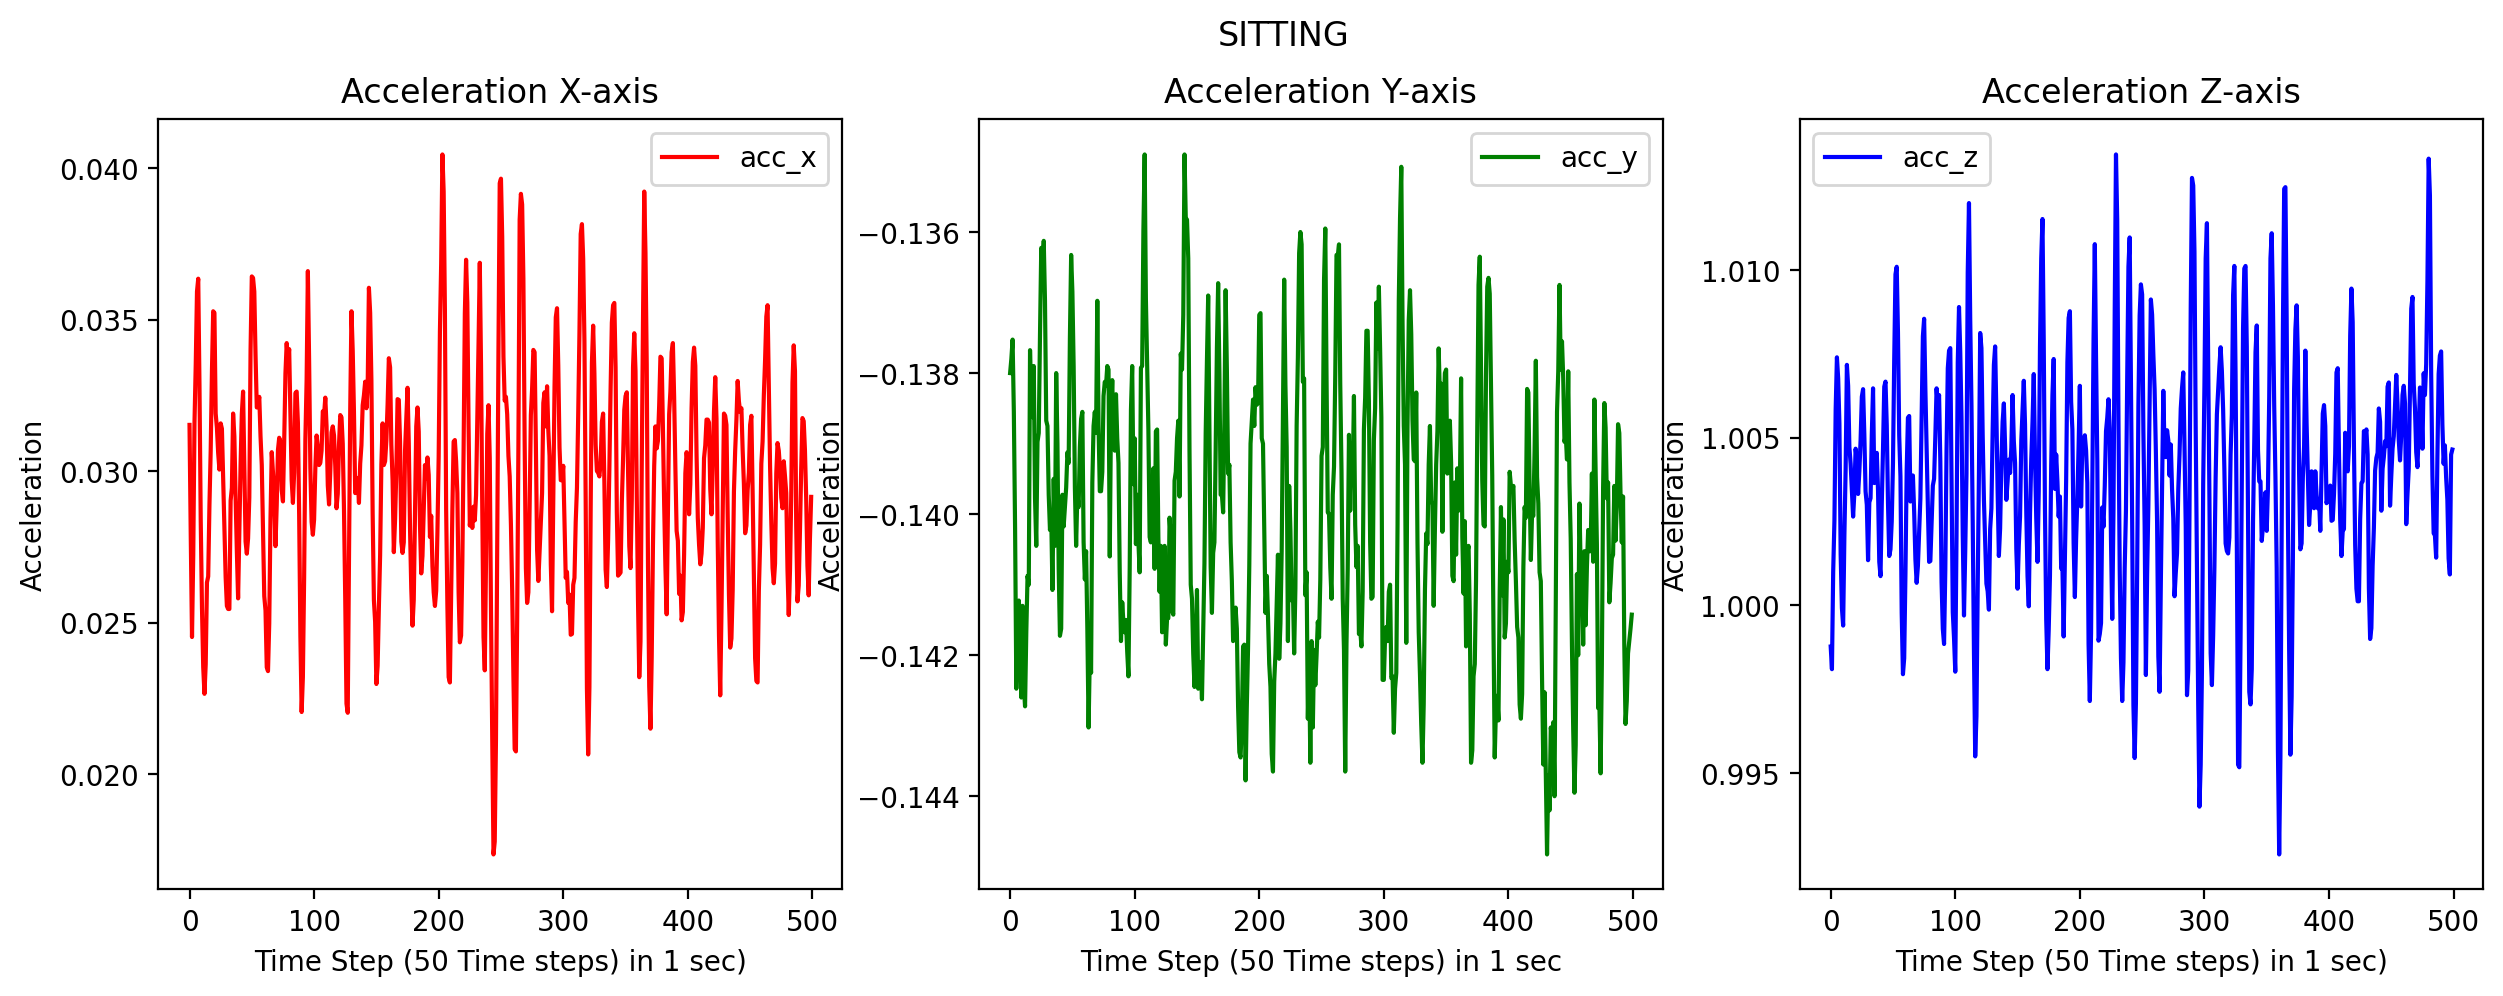

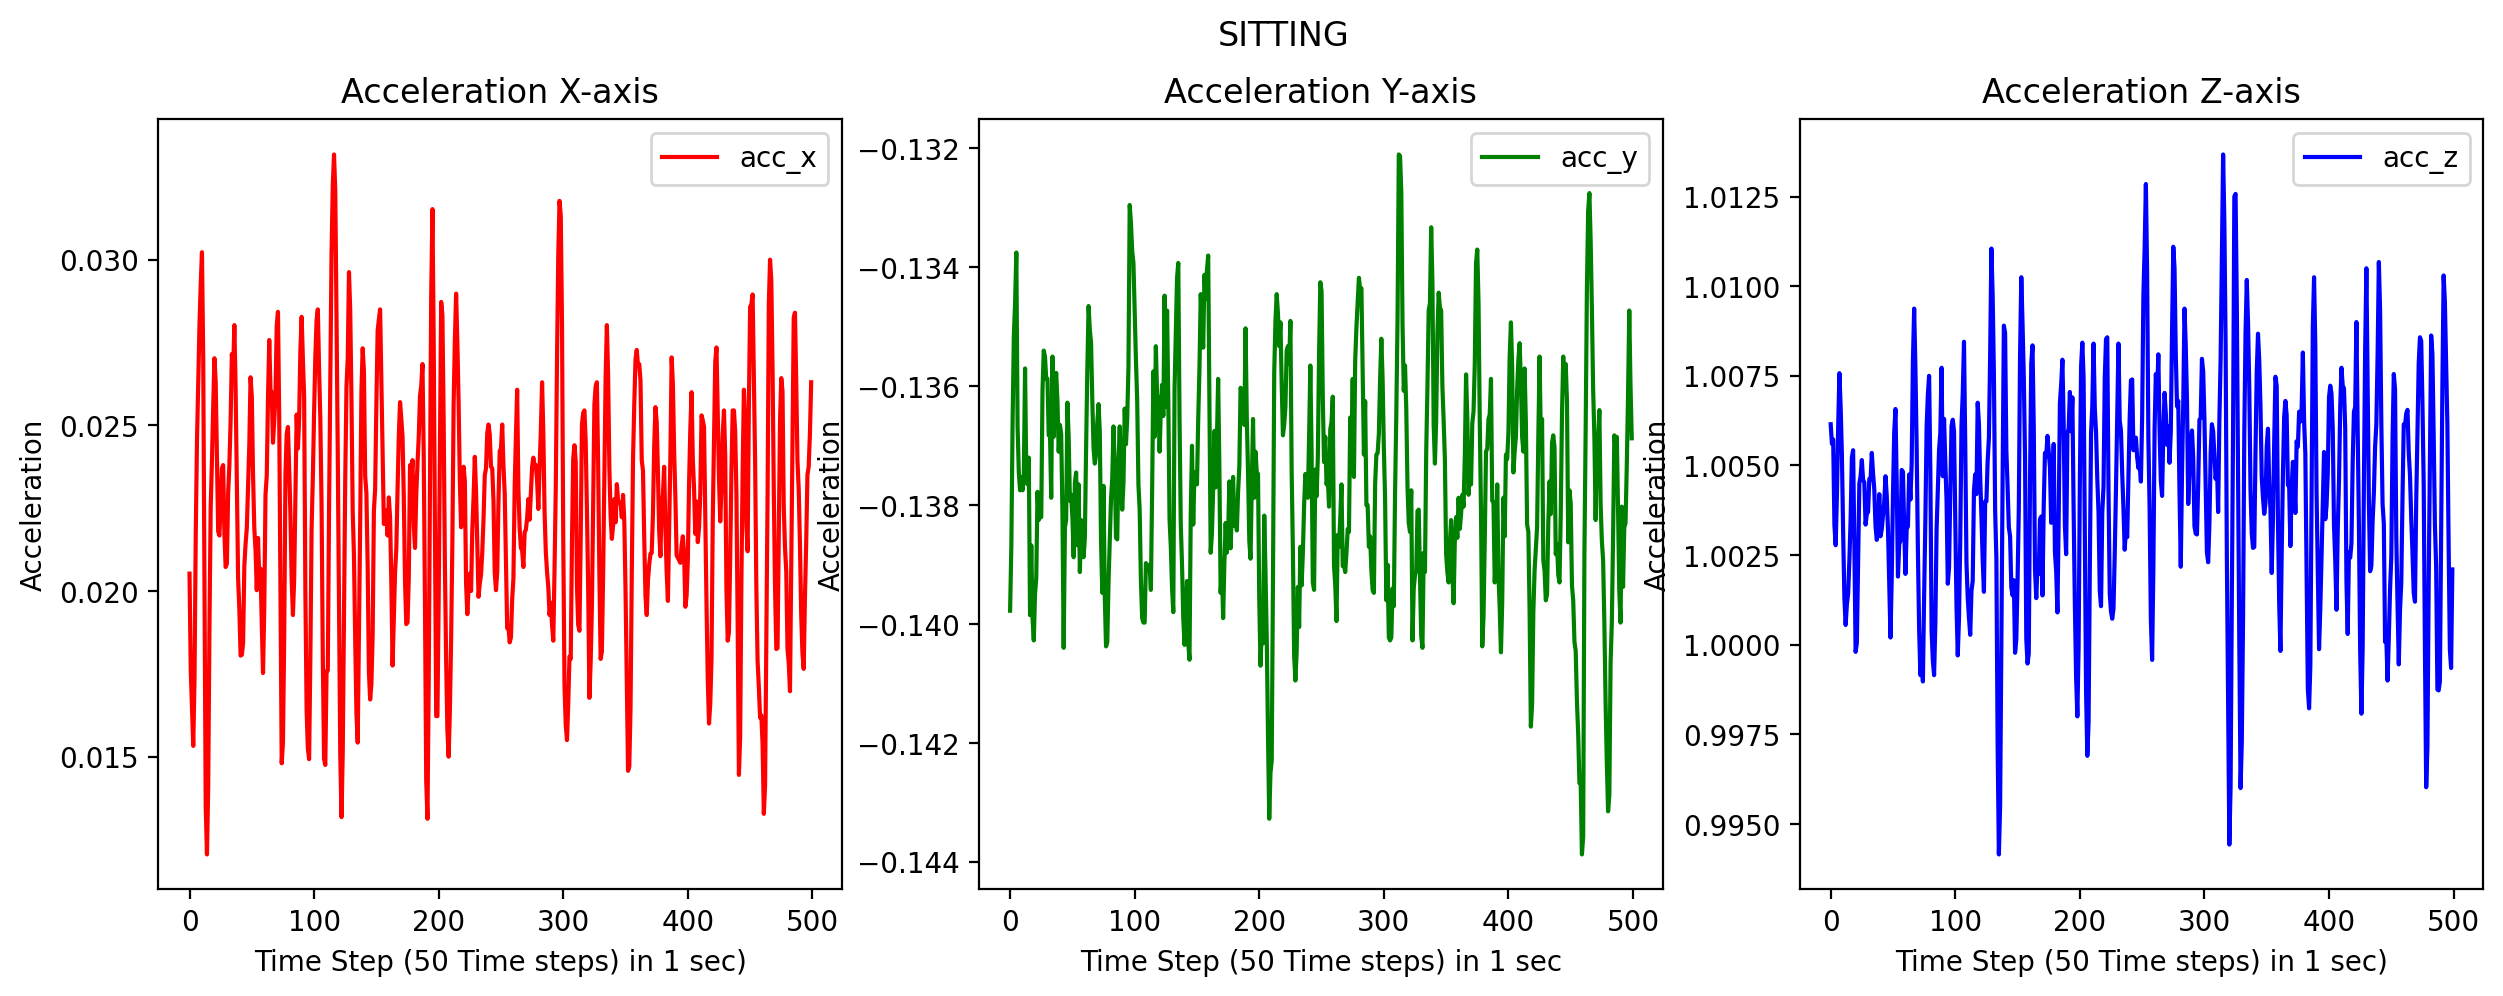

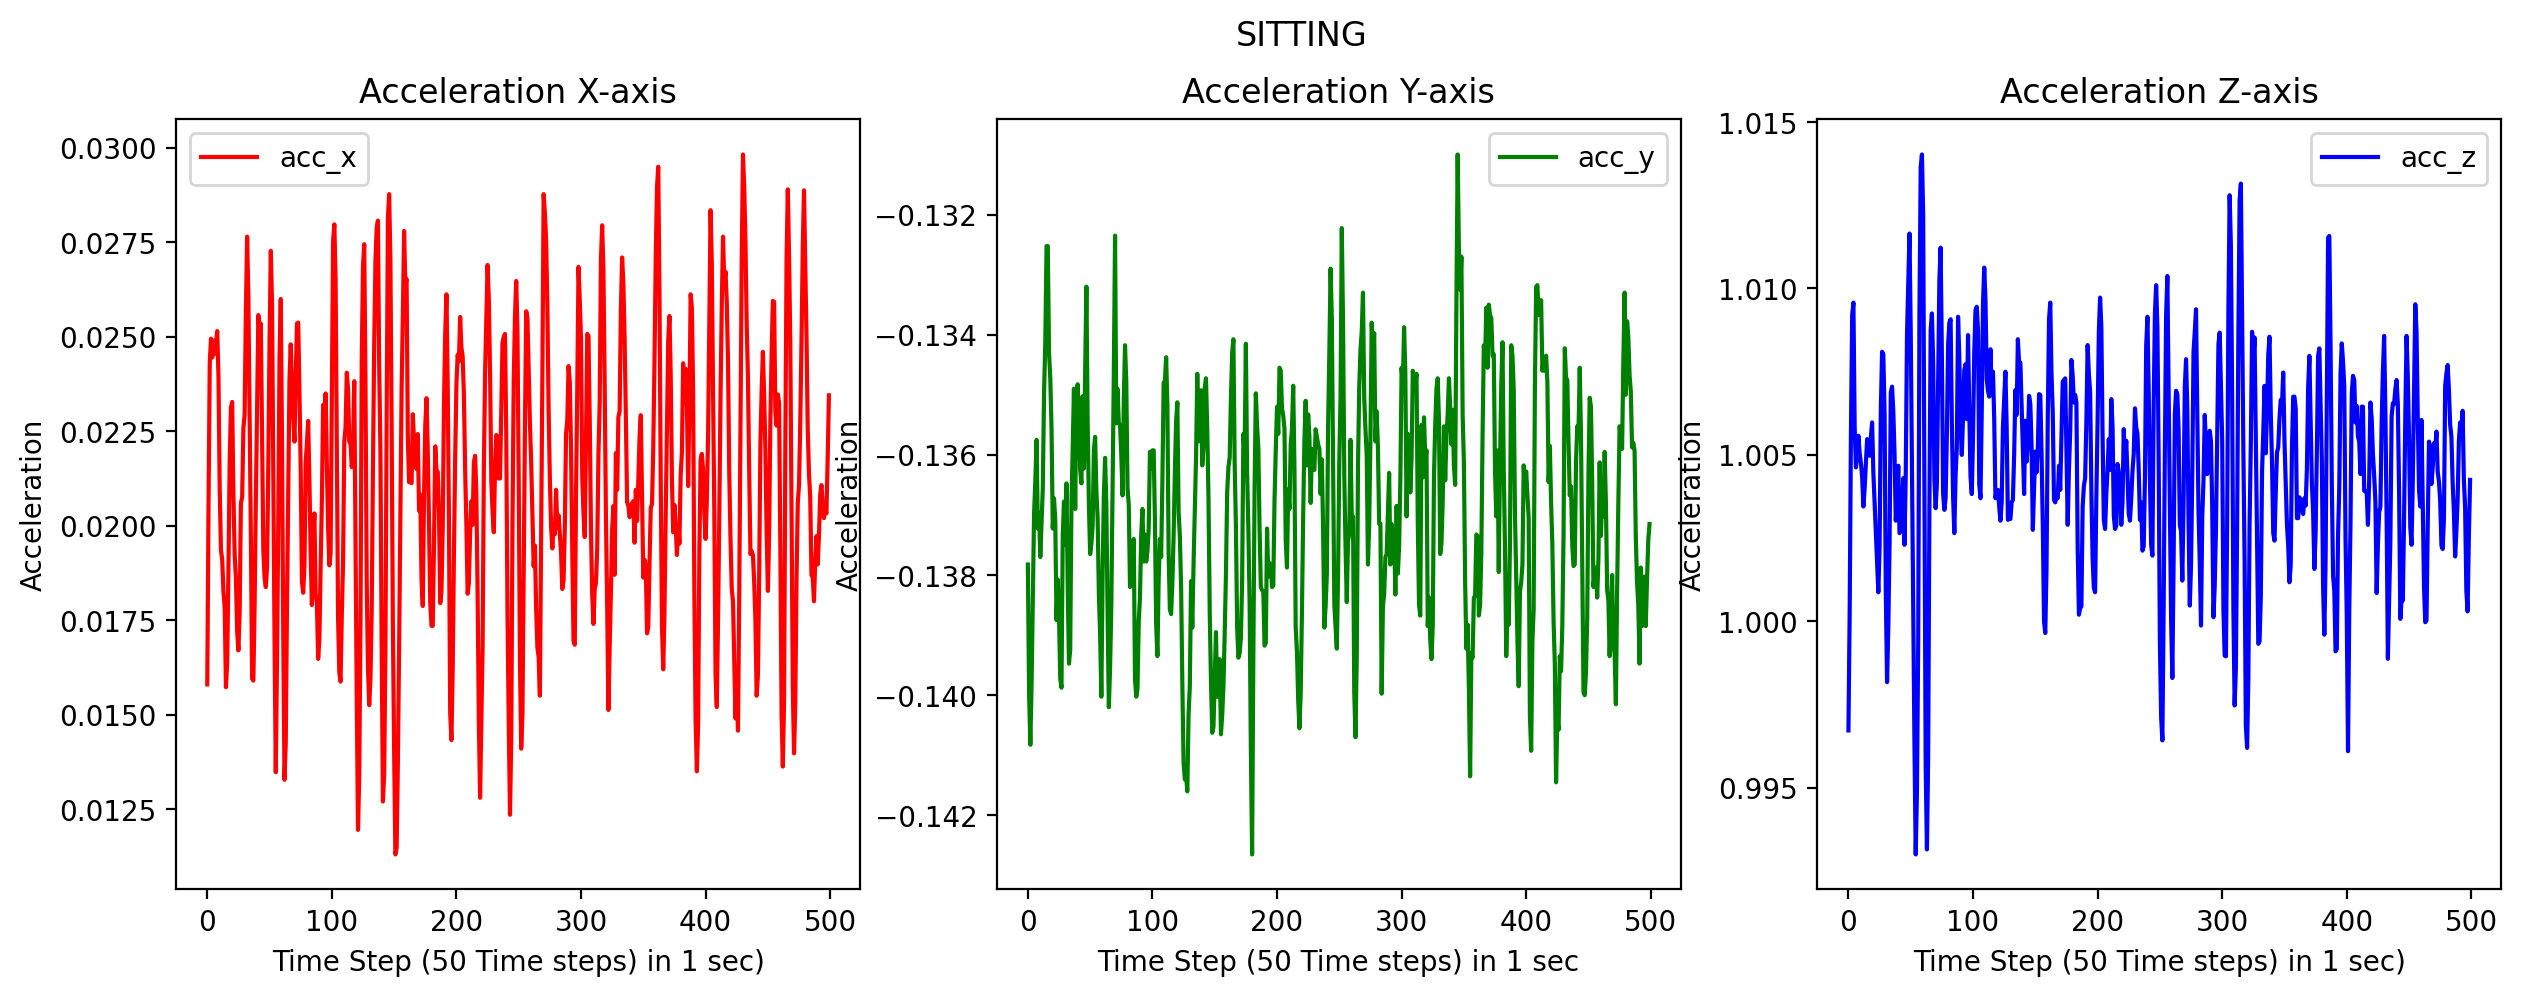

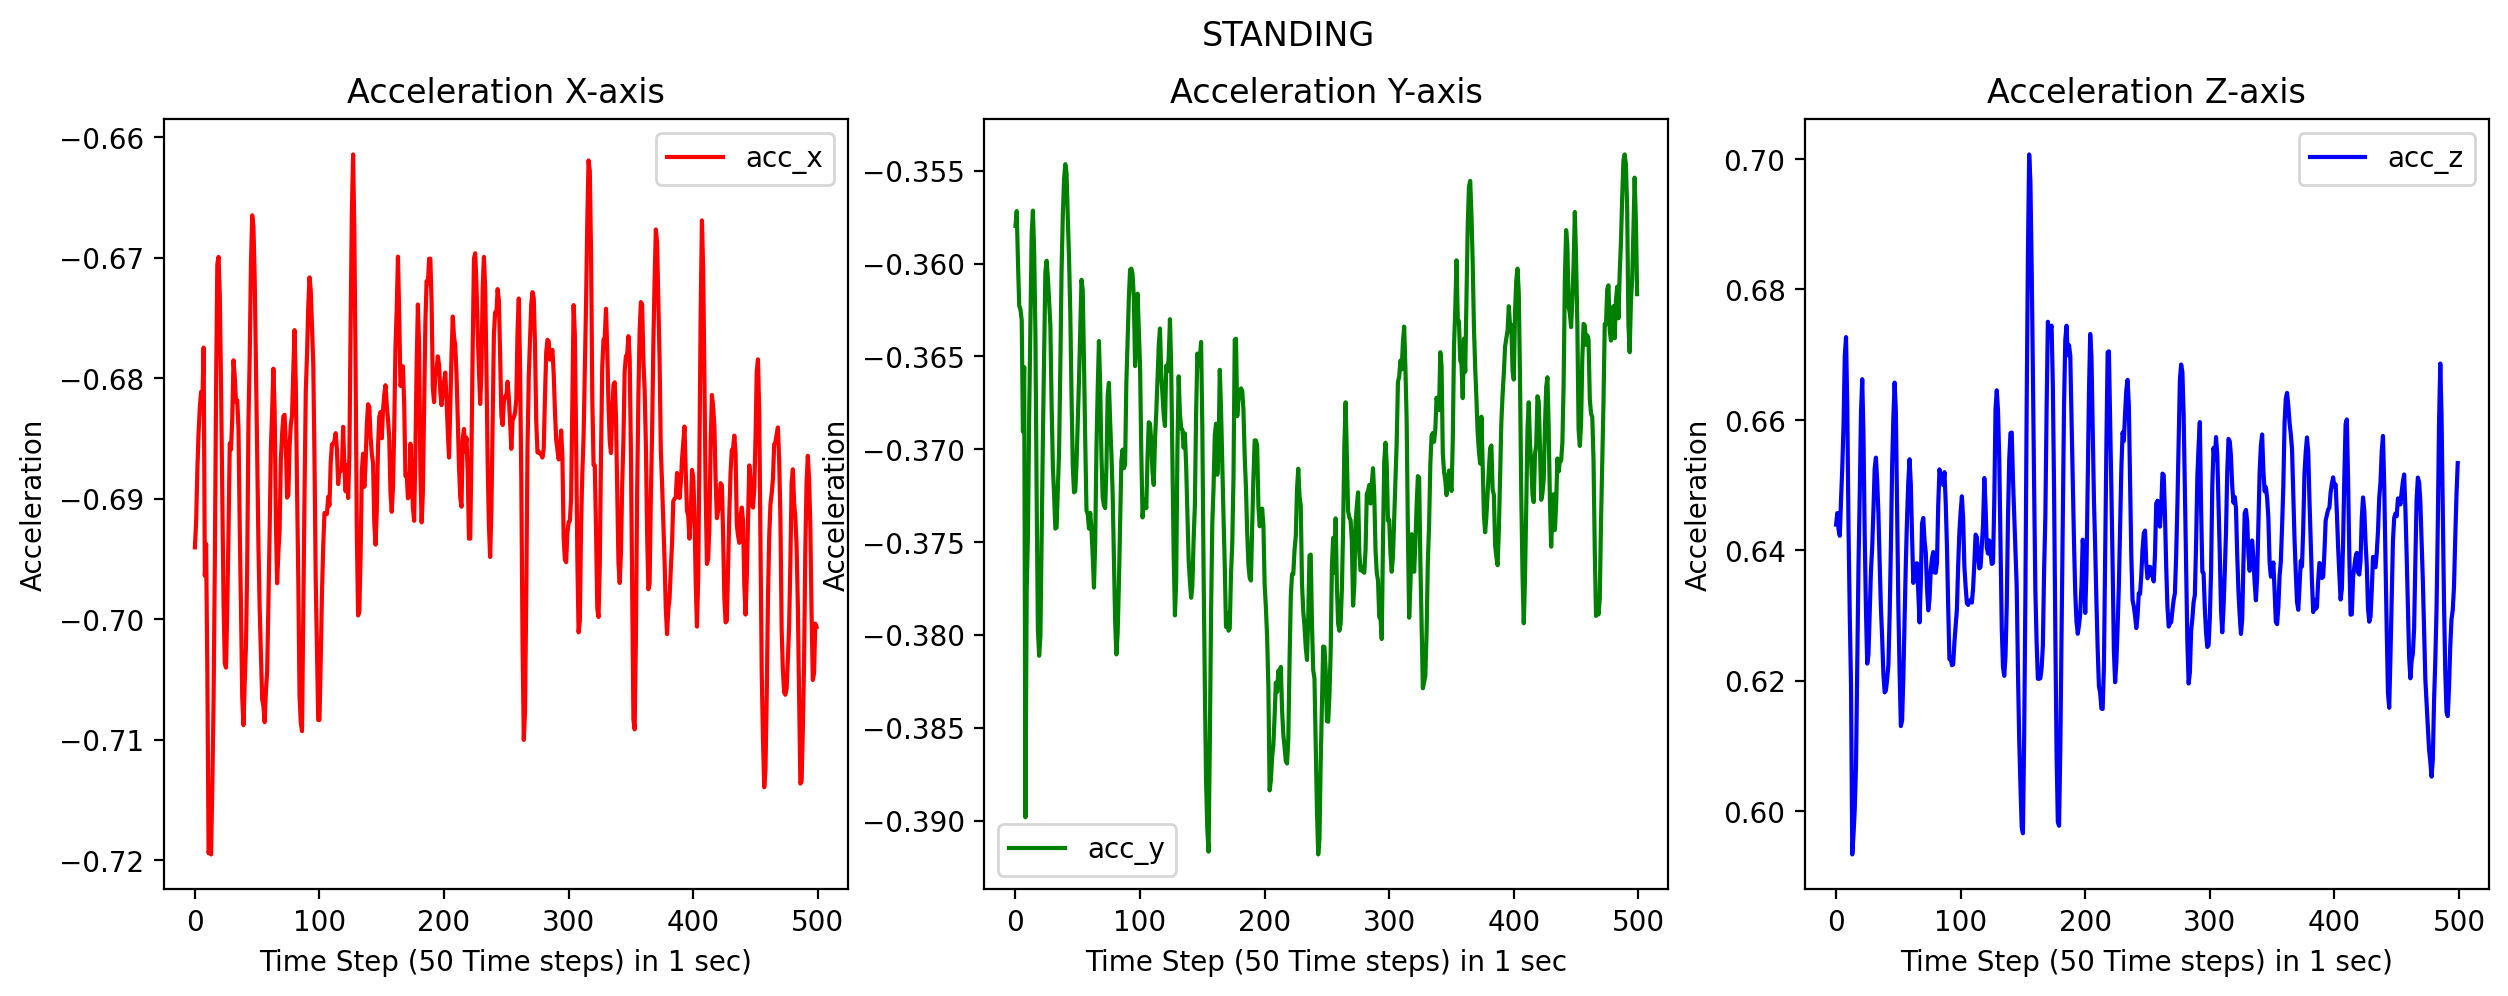

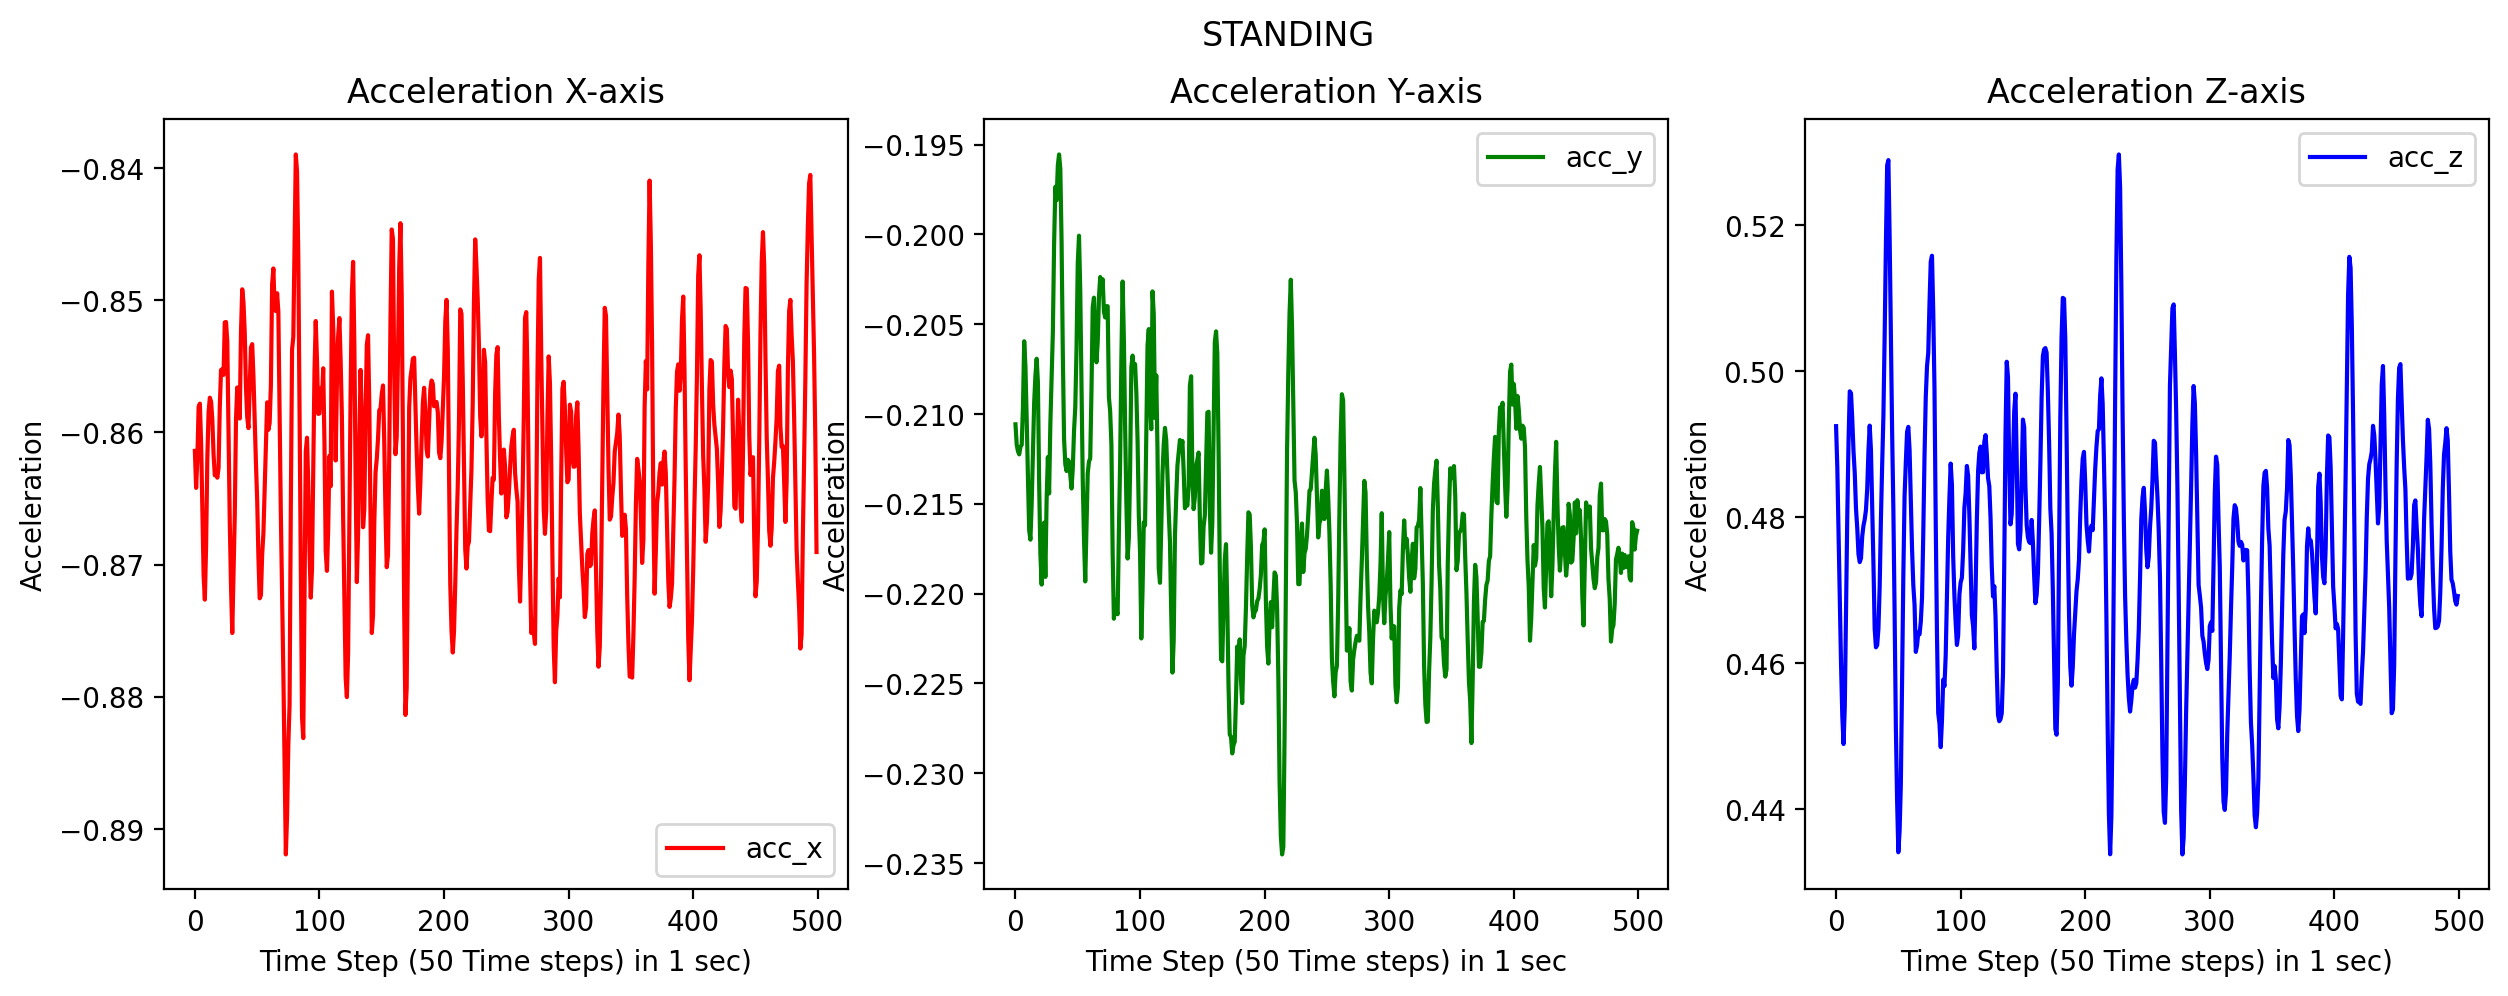

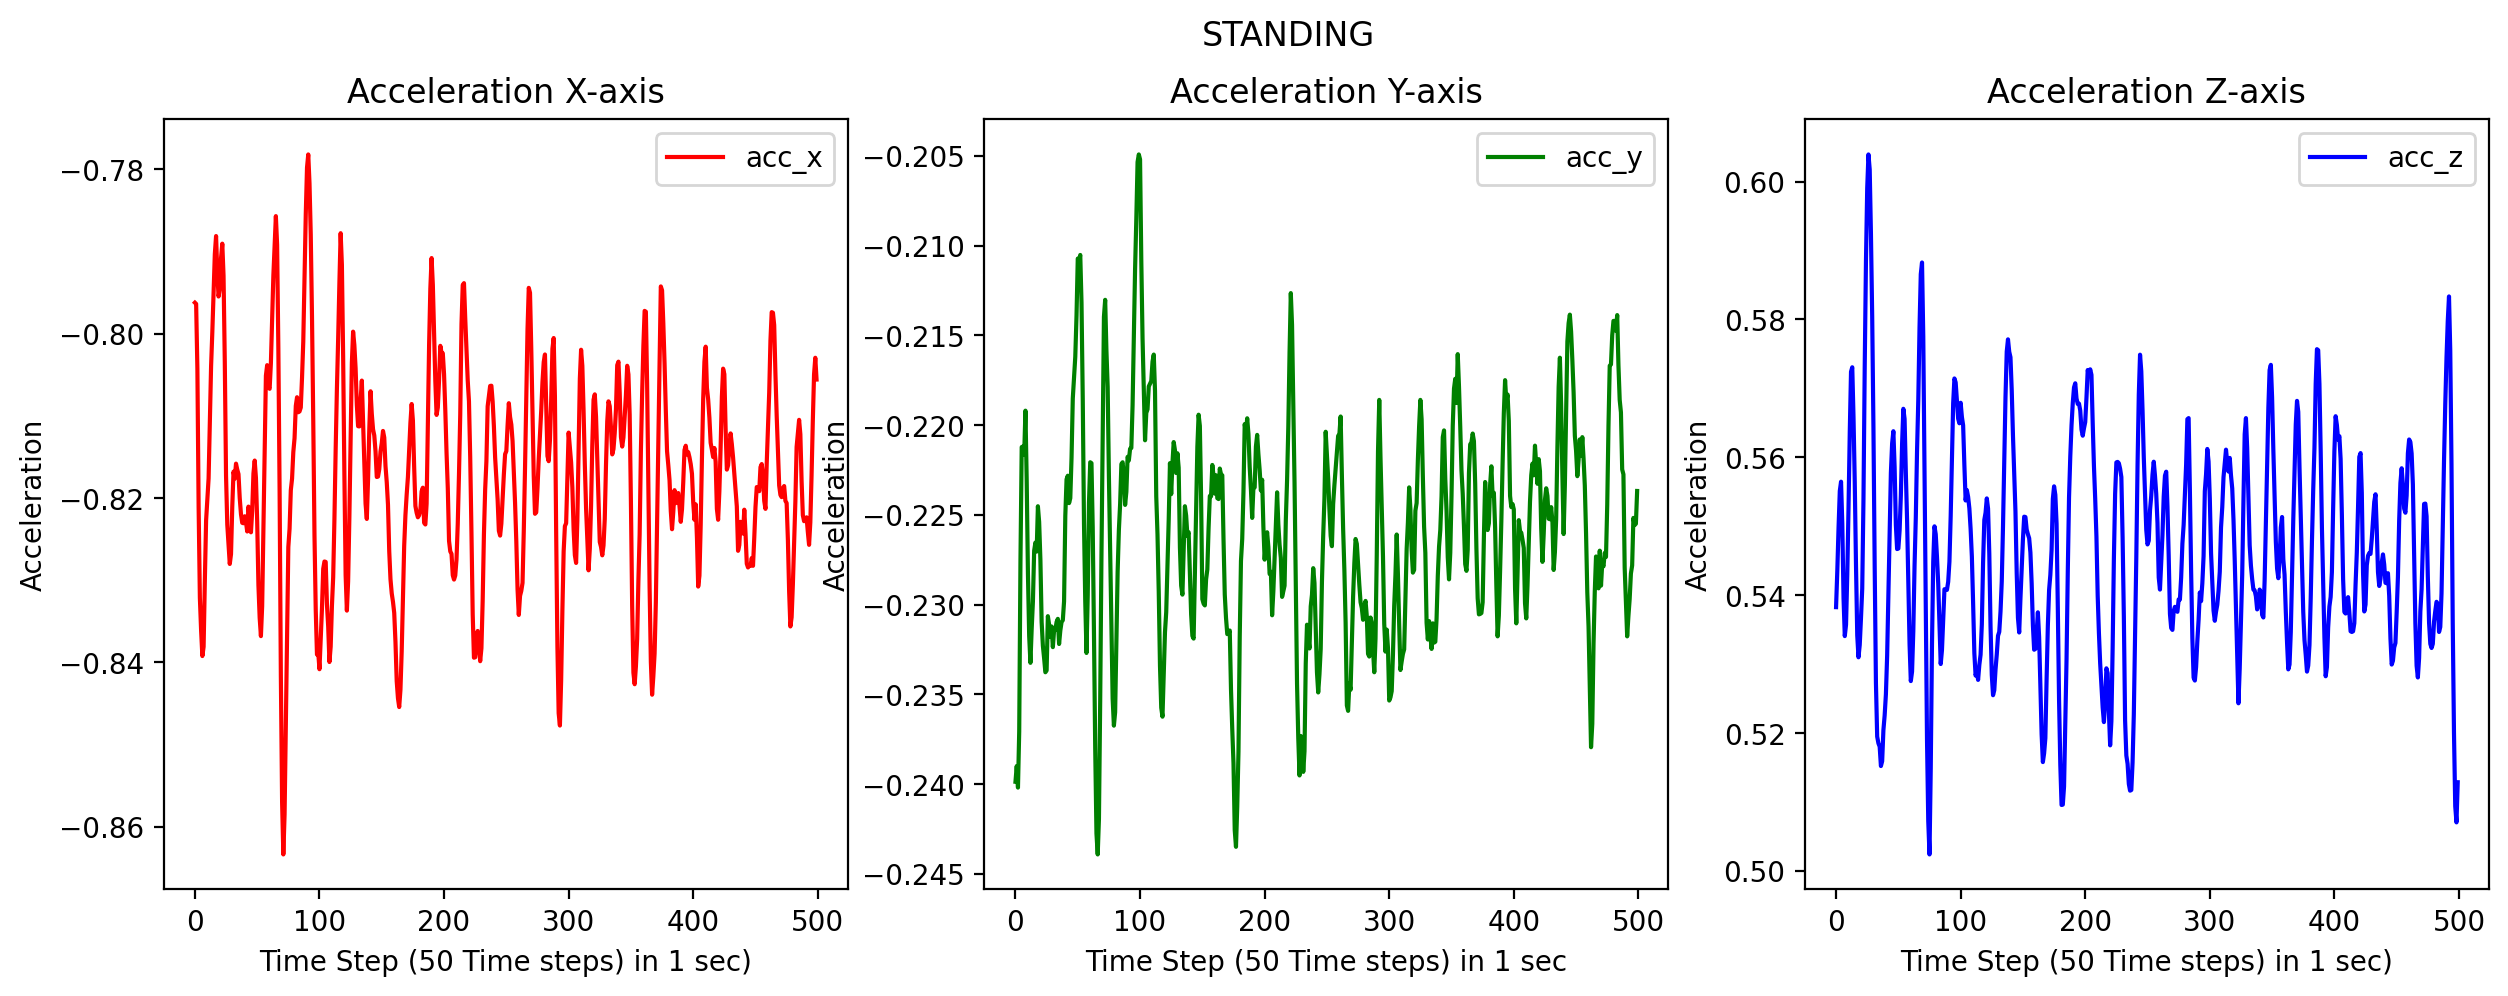

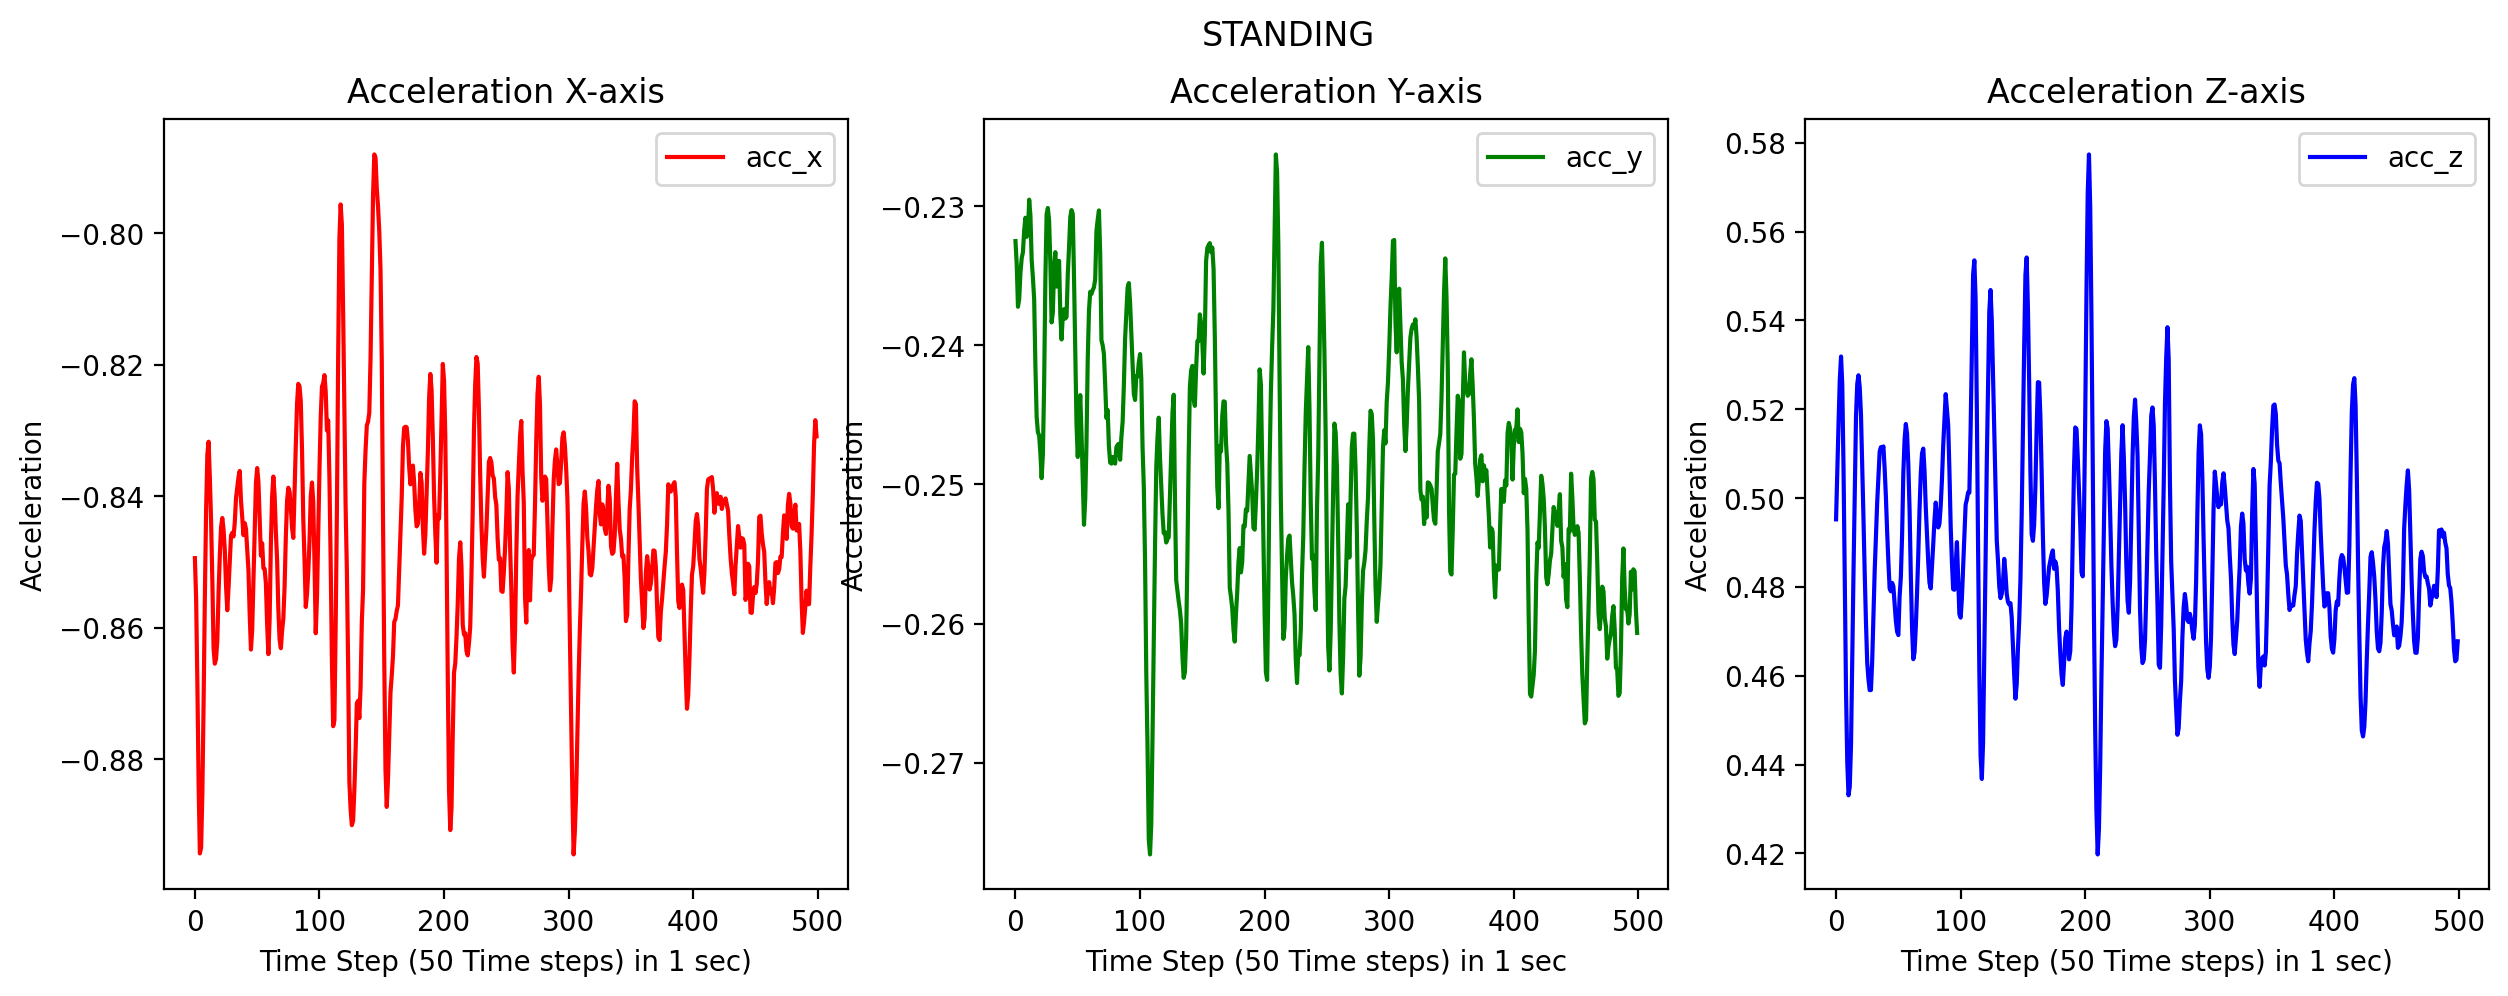

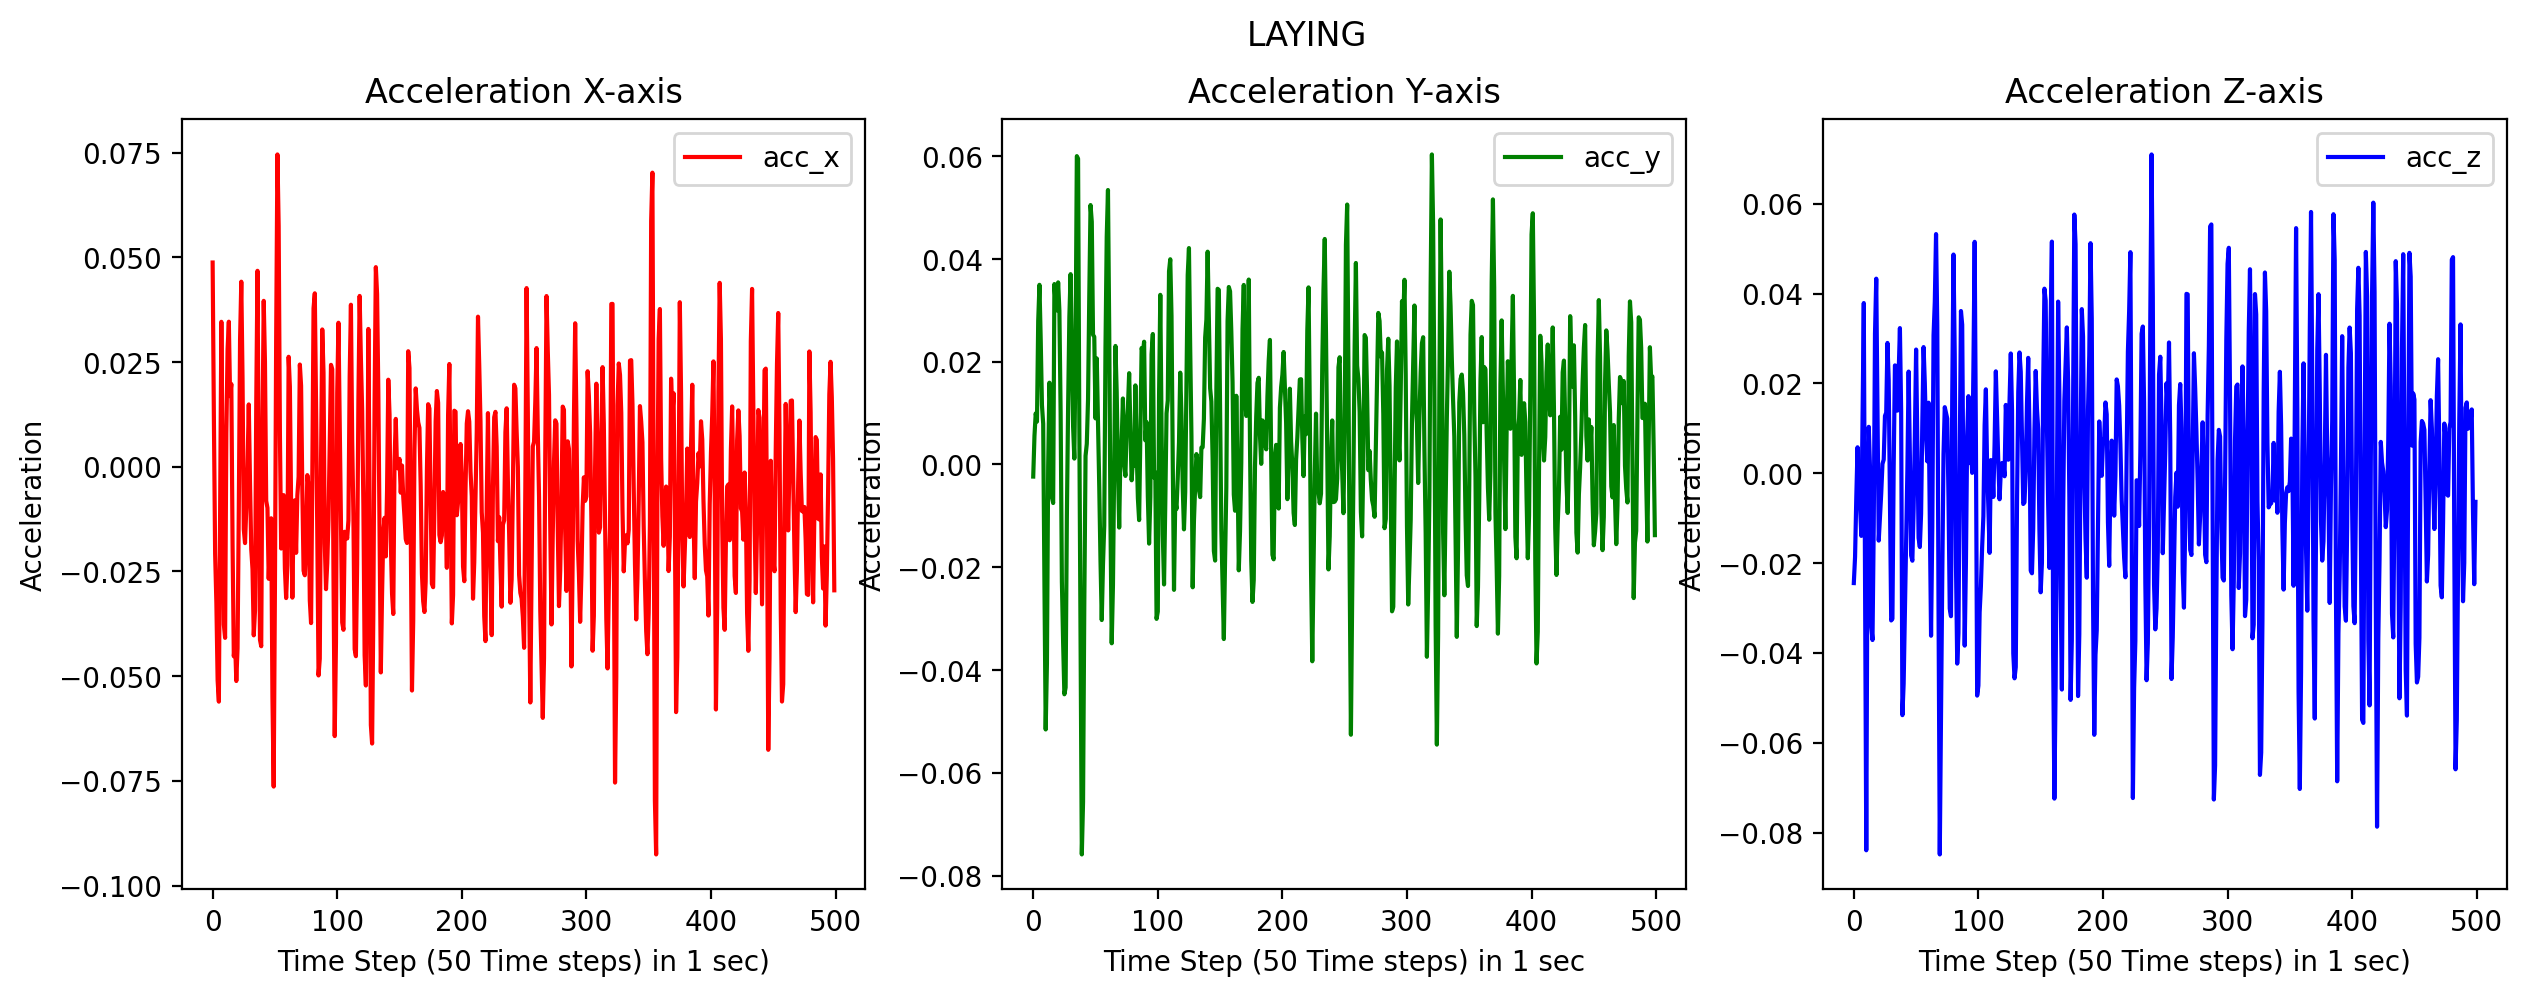

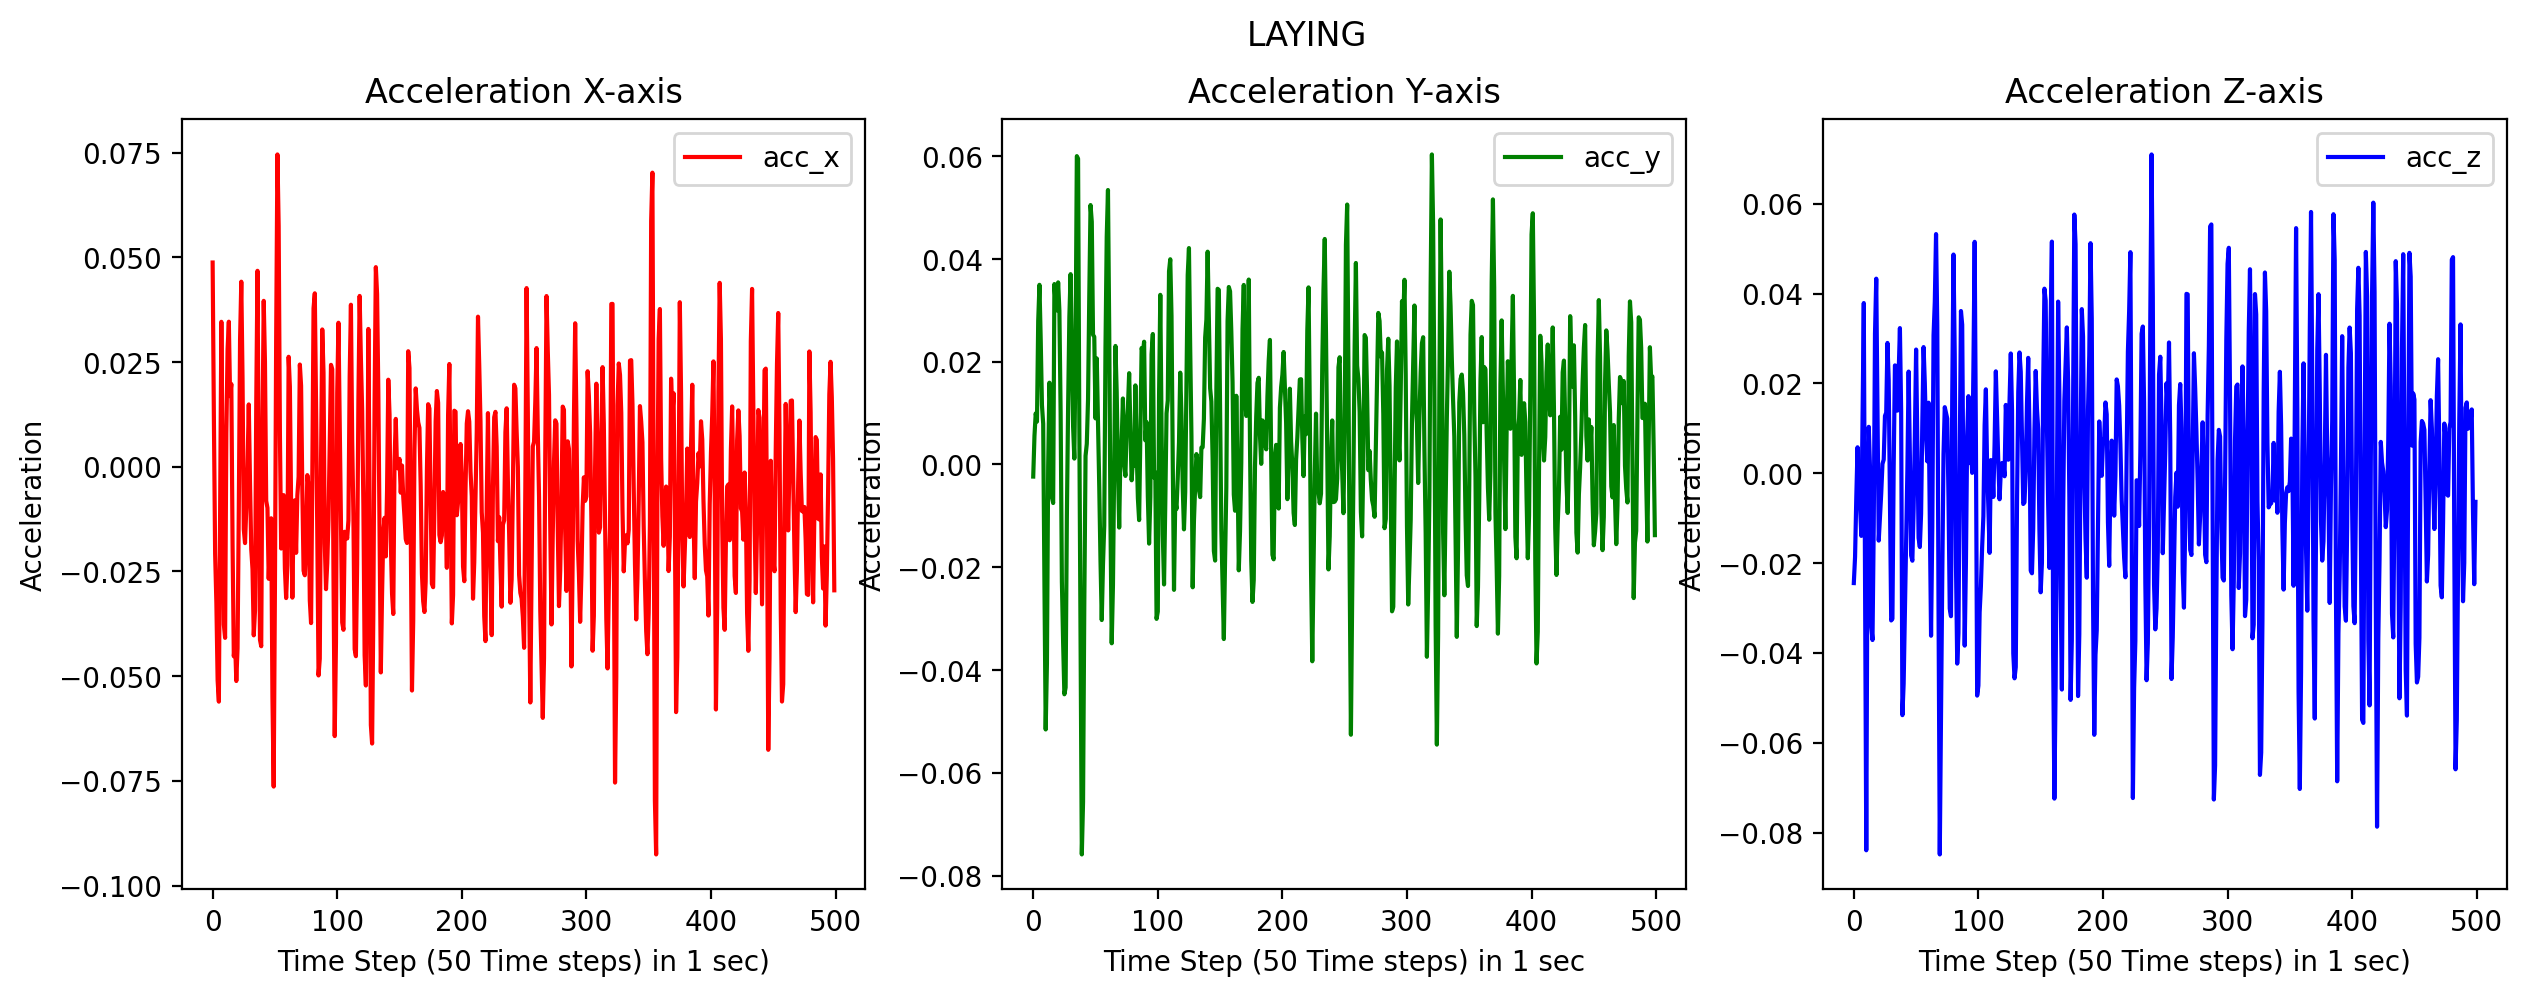

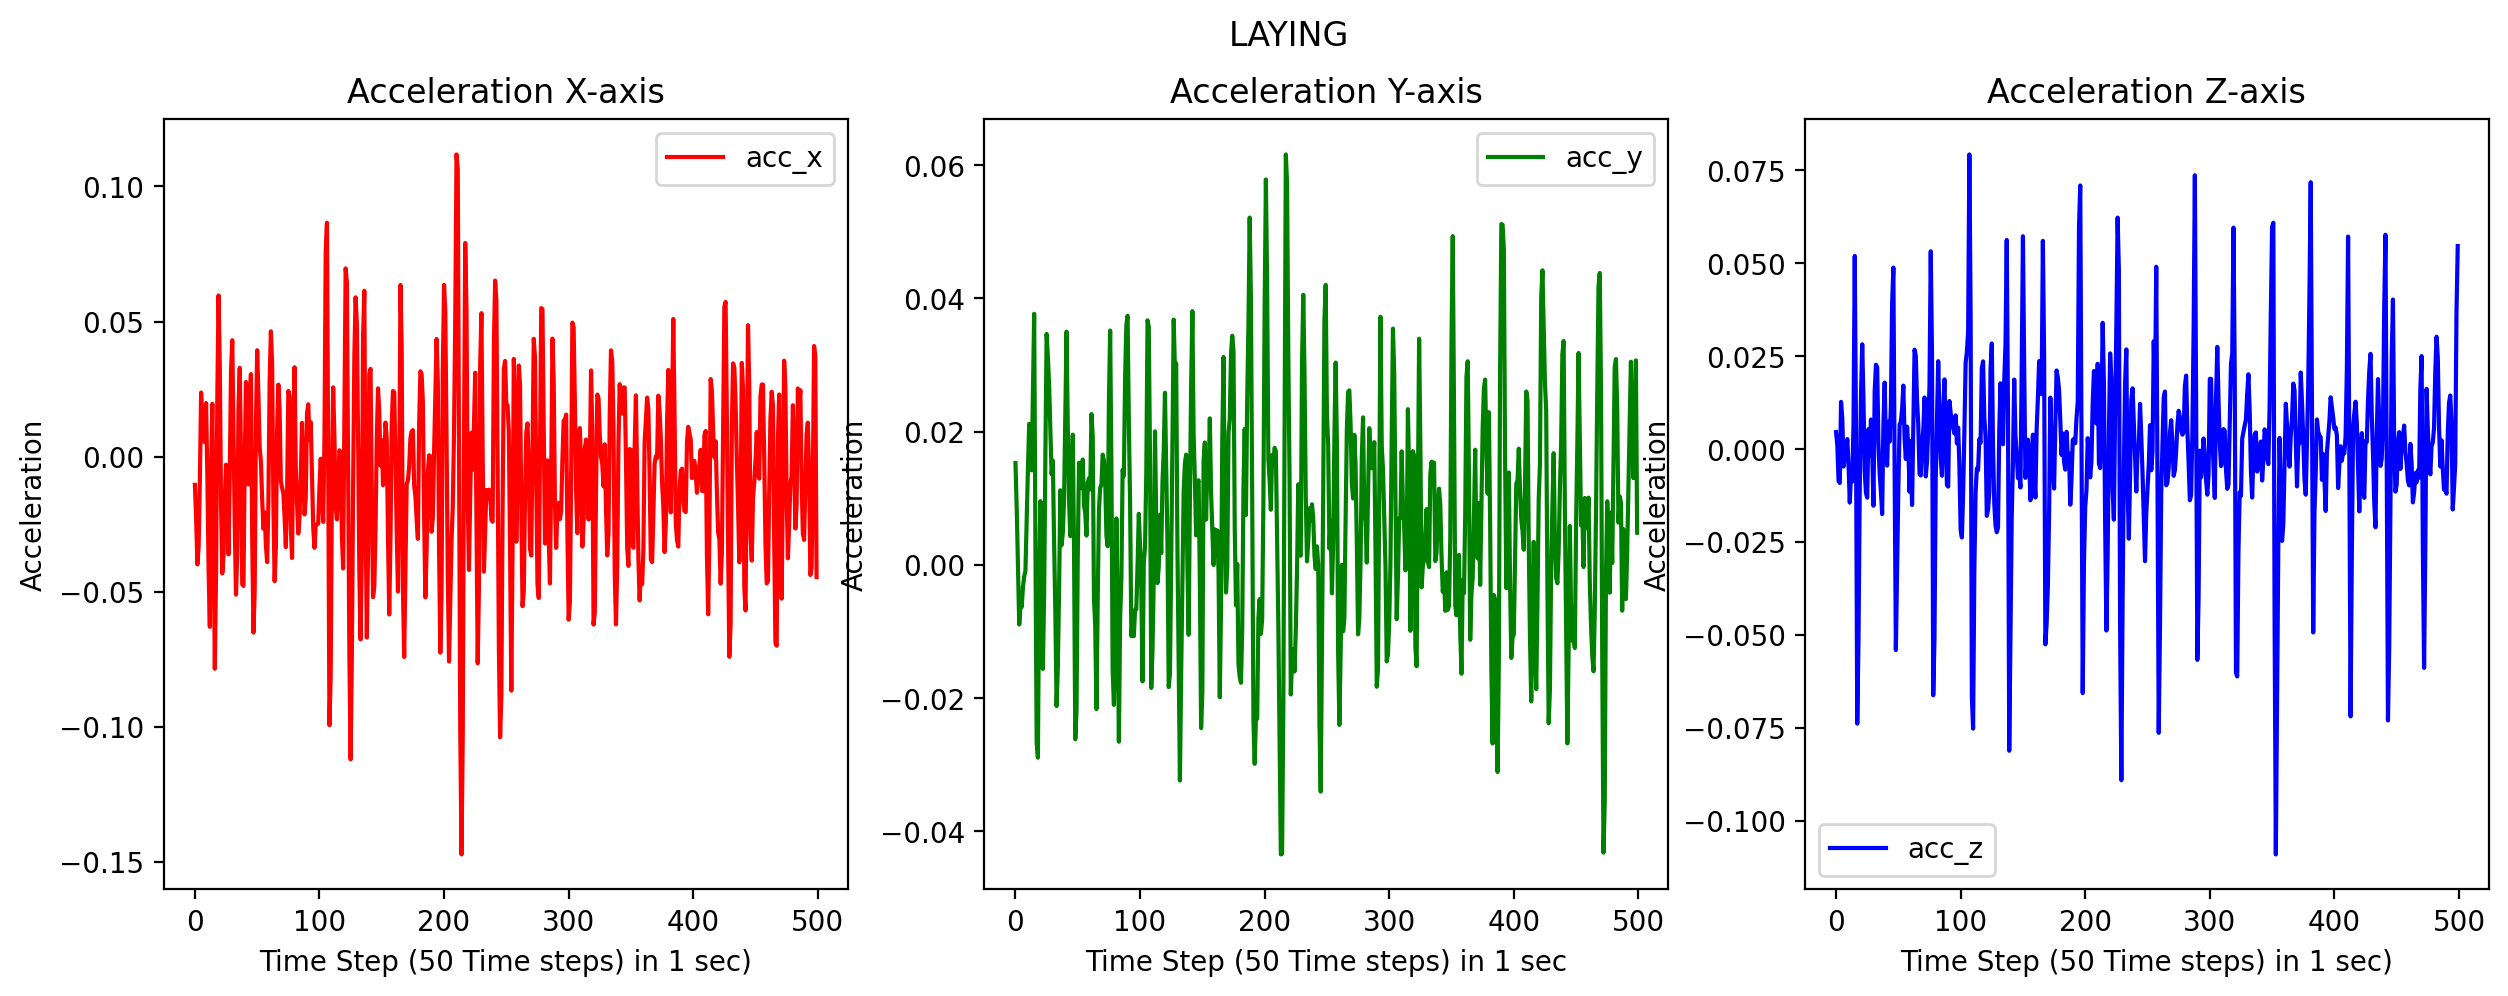

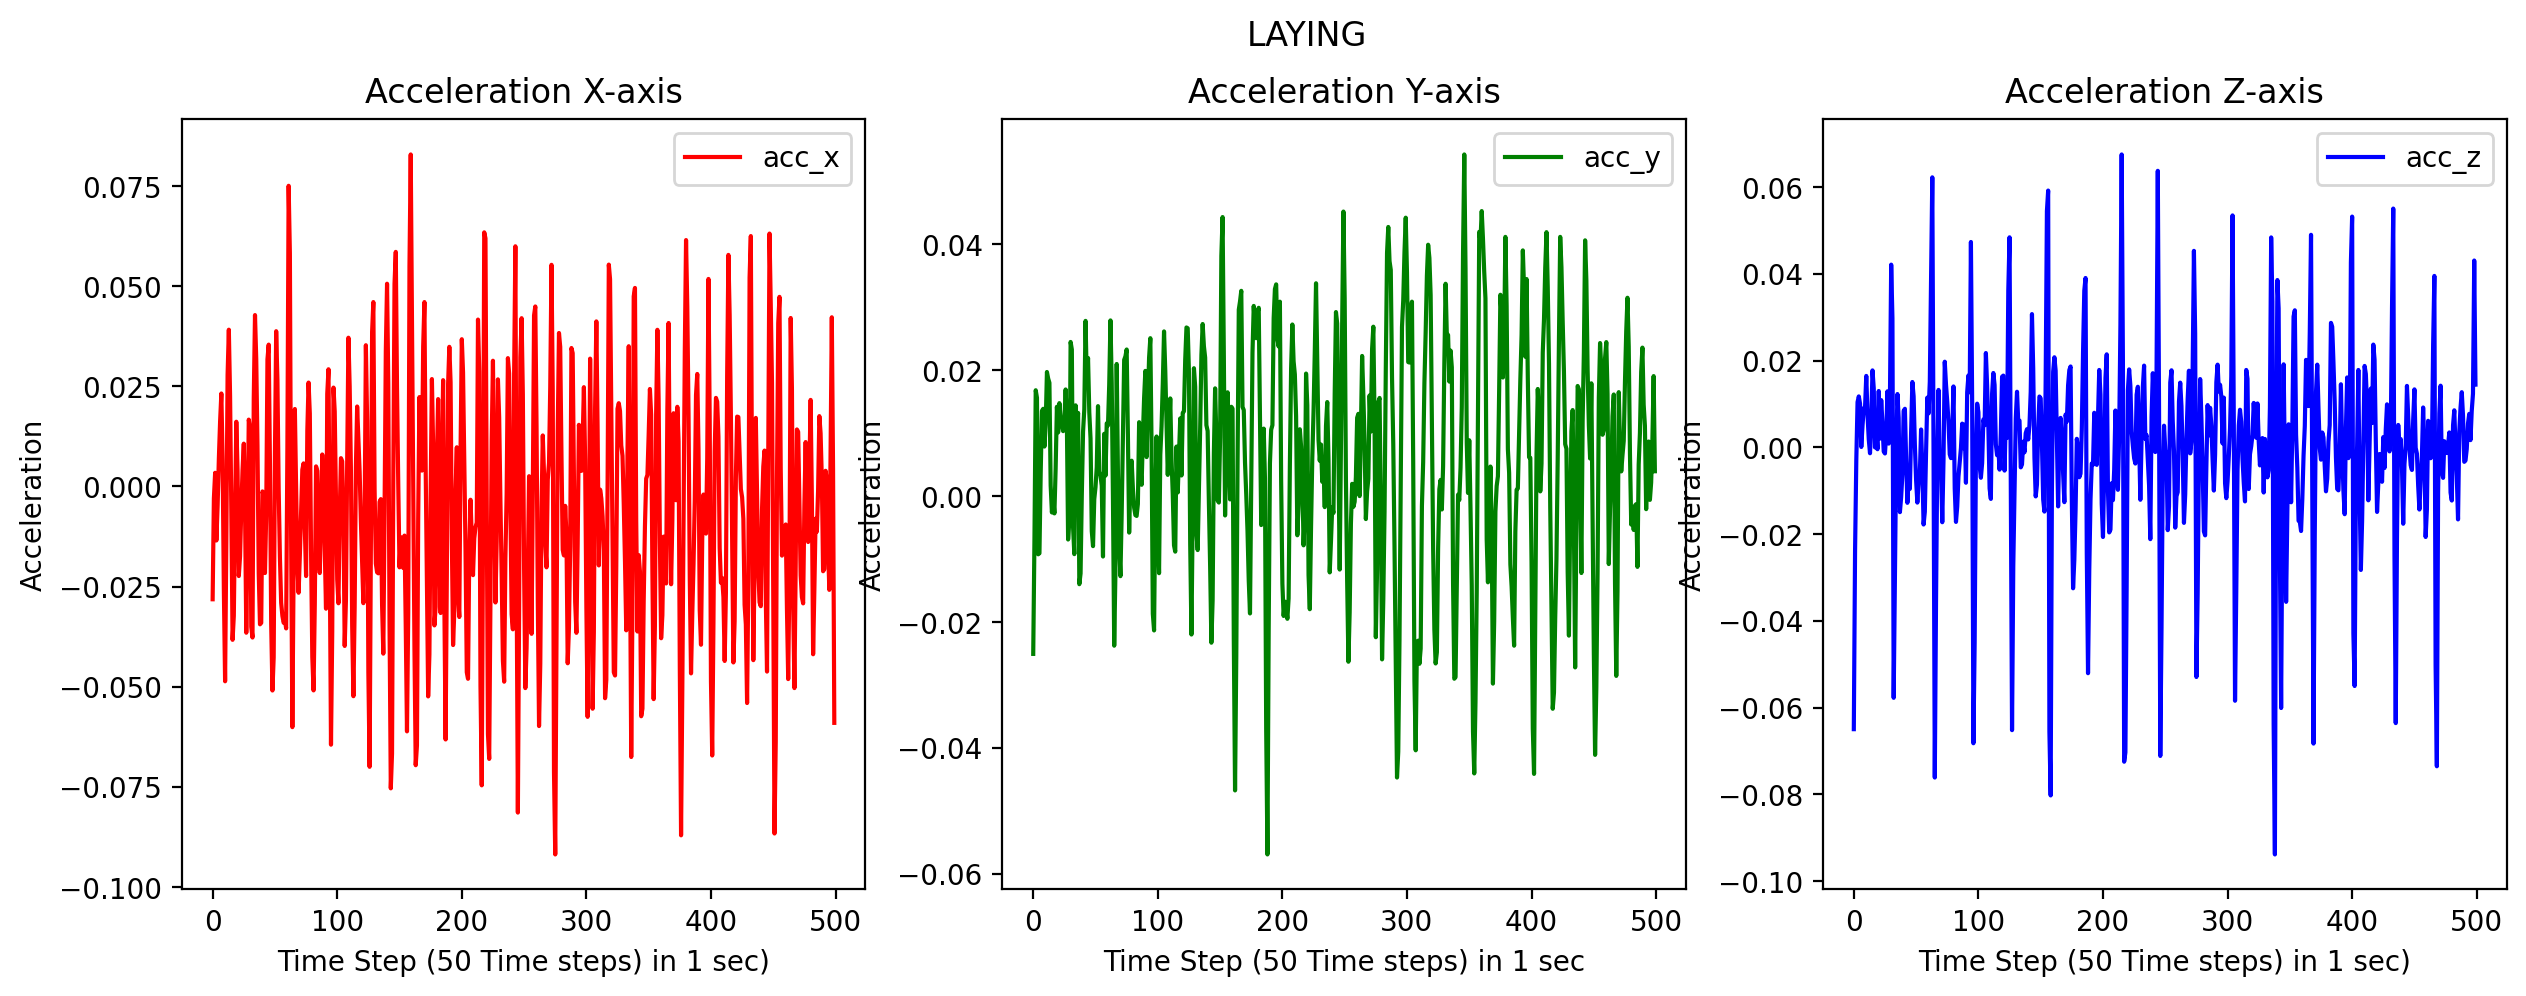

In [10]:
def plot_graph(samples, labels):
    

    for i in range(len(samples)):
        point_sample = samples[i]
        acc_x = point_sample[:,0]
        acc_y = point_sample[:,1]
        acc_z = point_sample[:,2]

        #Random subject sampling 
        plt.figure(figsize=(15, 5))
        plt.subplot(1, 3, 1)
        plt.plot(acc_x, label='acc_x', color='r')
        plt.title('Acceleration X-axis')
        plt.xlabel('Time Step (50 Time steps) in 1 sec)')
        plt.ylabel('Acceleration')
        plt.legend()

        # Plot acc_y
        plt.subplot(1, 3, 2)
        plt.plot(acc_y, label='acc_y', color='g')
        plt.title('Acceleration Y-axis')
        plt.xlabel('Time Step (50 Time steps) in 1 sec')
        plt.ylabel('Acceleration')
        plt.legend()

        # Plot acc_z
        plt.subplot(1, 3, 3)
        plt.plot(acc_z, label='acc_z', color='b')
        plt.title('Acceleration Z-axis')
        plt.xlabel('Time Step (50 Time steps) in 1 sec)')
        plt.ylabel('Acceleration')
        plt.legend()
        plt.suptitle(f"{labels[i]}")

        plt.show()

activity_labels = {v:k for k, v in classes.items()}
plot_graph(X, labels=[activity_labels[x] for x in y])